In [144]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs

In [2]:
year = 1998

In [3]:
file = '/data/users/hgilmour/initial_tracks/tobac_initial_tracks/tracking/tracks_{}.h5'.format(year)

original = pd.read_hdf(file, 'table')

original

frame  idx       hdim_1       hdim_2    num  threshold_value  feature  \
0          0    2   106.094677   542.929600  31239              240        1   
1          0    8   434.854273   747.635519  28419              240        2   
2          0   20   533.697618   937.641720  10675              240        3   
3          0   73   723.607307   647.238123  15813              240        4   
4          0   81   702.458527   876.074455   6735              240        5   
...      ...  ...          ...          ...    ...              ...      ...   
99502   8759  262   972.960889   299.143881   6753              240    99503   
99503   8759  267   975.621346   195.938269   4005              240    99504   
99504   8759  269  1043.693680  1217.441839  23072              240    99505   
99505   8759  281  1014.425553   418.327558   5939              240    99506   
99506   8759  348  1172.700632   208.199459   2012              240    99507   

                      time              timestr  projection_y_coordinate  \
0      1998-01-01 00:30:00  1998-01-01 00:30:00               -35.743217   
1      1998-01-01 00:30:00  1998-01-01 00:30:00               -22.428452   
2      1998-01-01 00:30:00  1998-01-01 00:30:00               -18.425296   
3      1998-01-01 00:30:00  1998-01-01 00:30:00               -10.733954   
4      1998-01-01 00:30:00  1998-01-01 00:30:00               -11.590480   
...                    ...                  ...                      ...   
99502  1998-12-31 23:30:00  1998-12-31 23:30:00                -0.635133   
99503  1998-12-31 23:30:00  1998-12-31 23:30:00                -0.527386   
99504  1998-12-31 23:30:00  1998-12-31 23:30:00                 2.229545   
99505  1998-12-31 23:30:00  1998-12-31 23:30:00                 1.044186   
99506  1998-12-31 23:30:00  1998-12-31 23:30:00                 7.454325   

       projection_x_coordinate   cell       time_cell  
0                   296.948687      1 0 days 00:00:00  
1                   305.239299     -1             NaT  
2                   312.934537     -1             NaT  
3                   301.173187     -1             NaT  
4                   310.441064     -1             NaT  
...                        ...    ...             ...  
99502               287.075376     -1             NaT  
99503               282.895541     -1             NaT  
99504               324.266459  22701 0 days 22:00:00  
99505               291.902313     -1             NaT  
99506               283.392141     -1             NaT  

[99507 rows x 13 columns]

In [4]:
print(np.unique(original.cell.values).shape[0], "cells in the original non-filtered dataset")

4358 cells in the original non-filtered dataset


In [5]:
CCPF = pd.DataFrame()

for file in glob.iglob('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/{}/CC&PF/*.hdf'.format(year)):   
   file = pd.read_hdf(file, 'table')
   CCPF = pd.concat([CCPF, file])

In [6]:
CCPF

frame  idx       hdim_1      hdim_2   num  threshold_value  feature  \
15651   1380   93   771.369817  211.990152  2412              240    15652   
15660   1381   90   775.818514  218.611922  4572              240    15661   
15670   1382   96   773.524616  217.623450  5171              240    15671   
15679   1383   91   767.841475  228.466812  7251              240    15680   
15691   1384  160   765.556522  225.455483  8047              240    15692   
...      ...  ...          ...         ...   ...              ...      ...   
67312   6115  226  1174.118637  791.270550  7727              240    67313   
67323   6116  232  1177.736231  792.432884  7105              240    67324   
67330   6117  234  1180.699601  792.982786  6309              240    67331   
67338   6118  219  1188.882235  800.940420  6002              240    67339   
67349   6119  224  1202.141218  847.817760  2175              240    67350   

                      time             timestr  projection_y_coordinate  ...  \
15651  1998-02-27 12:30:00 1998-02-27 12:30:00                -8.799573  ...   
15660  1998-02-27 13:30:00 1998-02-27 13:30:00                -8.619401  ...   
15670  1998-02-27 14:30:00 1998-02-27 14:30:00                -8.712304  ...   
15679  1998-02-27 15:30:00 1998-02-27 15:30:00                -8.942471  ...   
15691  1998-02-27 16:30:00 1998-02-27 16:30:00                -9.035011  ...   
...                    ...                 ...                      ...  ...   
67312  1998-09-12 19:30:00 1998-09-12 19:30:00                 7.511755  ...   
67323  1998-09-12 20:30:00 1998-09-12 20:30:00                 7.658266  ...   
67330  1998-09-12 21:30:00 1998-09-12 21:30:00                 7.778285  ...   
67338  1998-09-12 22:30:00 1998-09-12 22:30:00                 8.109679  ...   
67349  1998-09-12 23:30:00 1998-09-12 23:30:00                 8.646669  ...   

                 datetime  max_precip_lat max_precip_lon  min_tb_lat  \
15651 1998-02-27 12:30:00       -8.004551     283.627045    -8.04505   
15660 1998-02-27 13:30:00        -8.20705     284.234558   -8.126051   
15670 1998-02-27 14:30:00        -7.92355     284.234558    -8.08555   
15679 1998-02-27 15:30:00        -9.50305      285.24704   -8.369051   
15691 1998-02-27 16:30:00      -10.758551     285.530548  -10.799051   
...                   ...             ...            ...         ...   
67312 1998-09-12 19:30:00        7.304451     306.266541    7.101948   
67323 1998-09-12 20:30:00        7.790451     306.995544    7.344948   
67330 1998-09-12 21:30:00        8.559948     309.142059    7.425949   
67338 1998-09-12 22:30:00        8.843449     309.952057    8.843449   
67349 1998-09-12 23:30:00        8.762451     309.425537    8.802948   

       min_tb_lon  max_w_up_lat  max_w_up_lon  max_w_down_lat  max_w_down_lon  \
15651  283.546051     -8.510799    284.133301       -8.875299        283.3638   
15660  284.234558             0             0               0               0   
15670  284.194061             0             0               0               0   
15679  284.113037     -8.510799     286.60379       -8.227299      284.173798   
15691  285.530548             0             0               0               0   
...           ...           ...           ...             ...             ...   
67312  305.861542             0             0               0               0   
67323  306.064056             0             0               0               0   
67330   306.02356      8.620701    309.364777        8.701702      309.243286   
67338  309.992554             0             0               0               0   
67349  309.871063             0             0               0               0   

       colocated_pixels  
15651               441  
15660               636  
15670               547  
15679               824  
15691               919  
...                 ...  
67312               276  
67323               178  
67330                88  
67338      

In [7]:
print(np.unique(CCPF.cell.values).shape[0], "cells in the filtered dataset")

2956 cells in the filtered dataset


In [8]:
CCPF.columns

Index(['frame', 'idx', 'hdim_1', 'hdim_2', 'num', 'threshold_value', 'feature',
       'time', 'timestr', 'projection_y_coordinate', 'projection_x_coordinate',
       'cell', 'time_cell', 'total_precip', 'rain_flag', 'convective_precip',
       'heavy_precip', 'extreme_precip', 'heavy_rain_flag',
       'extreme_rain_flag', 'max_precip', 'mean_precip_total', 'mean_precip',
       'tb_min', 'tb_mean', 'tb_210', 'tb_200', 'tb_190', 'tb_180', 'w_max',
       'w_min', 'w_mean', 'w_mean_up', 'w_mean_down', 'w_up_area',
       'w_down_area', 'w_0.1_up', 'w_1_up', 'w_5_up', 'w_0.1_down', 'w_1_down',
       'w_5_down', 'datetime', 'max_precip_lat', 'max_precip_lon',
       'min_tb_lat', 'min_tb_lon', 'max_w_up_lat', 'max_w_up_lon',
       'max_w_down_lat', 'max_w_down_lon', 'colocated_pixels'],
      dtype='object')

In [9]:
CCPF.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/CCPF_{}.hdf'.format(year, year), 'table')

/var/tmp/ipykernel_106320/1912415779.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['time', 'max_precip_lat', 'max_precip_lon', 'min_tb_lat', 'min_tb_lon',
       'max_w_up_lat', 'max_w_up_lon', 'max_w_down_lat', 'max_w_down_lon'],
      dtype='object')]

  CCPF.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/CCPF_{}.hdf'.format(year, year), 'table')


In [10]:
CCPF = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/CCPF_{}.hdf'.format(year, year), 'table')

In [11]:
CCPF["timestr"] = CCPF["timestr"].astype('datetime64[ns]')

In [12]:
CCPF.sort_values(by=['timestr'])

frame  idx       hdim_1       hdim_2    num  threshold_value  feature  \
64         6   11   527.851968   835.099179  27235              240       65   
72         7   19   541.404443   838.862144  23763              240       73   
81         8   13   560.325668   833.225115  25994              240       82   
84         8  135   918.901266   108.150381   5388              240       85   
88         9   13   565.939739   840.618702  22760              240       89   
...      ...  ...          ...          ...    ...              ...      ...   
99454   8757    1   231.458826   689.561010  20356              240    99455   
99474   8758    1   223.303978   716.938151  16183              240    99475   
99489   8758  274  1044.679955  1215.885991  22869              240    99490   
99492   8759    1   229.376237   725.723547  12081              240    99493   
99504   8759  269  1043.693680  1217.441839  23072              240    99505   

                      time             timestr  projection_y_coordinate  ...  \
64     1998-01-01 06:30:00 1998-01-01 06:30:00               -18.662045  ...   
72     1998-01-01 07:30:00 1998-01-01 07:30:00               -18.113171  ...   
81     1998-01-01 08:30:00 1998-01-01 08:30:00               -17.346860  ...   
84     1998-01-01 08:30:00 1998-01-01 08:30:00                -2.824548  ...   
88     1998-01-01 09:30:00 1998-01-01 09:30:00               -17.119491  ...   
...                    ...                 ...                      ...  ...   
99454  1998-12-31 21:30:00 1998-12-31 21:30:00               -30.665968  ...   
99474  1998-12-31 22:30:00 1998-12-31 22:30:00               -30.996239  ...   
99489  1998-12-31 22:30:00 1998-12-31 22:30:00                 2.269487  ...   
99492  1998-12-31 23:30:00 1998-12-31 23:30:00               -30.750313  ...   
99504  1998-12-31 23:30:00 1998-12-31 23:30:00                 2.229545  ...   

                 datetime  max_precip_lat max_precip_lon  min_tb_lat  \
64    1998-01-01 06:30:00      -18.372551     310.964539   -17.96755   
72    1998-01-01 07:30:00       -14.68705     308.777557  -14.646551   
81    1998-01-01 08:30:00      -14.849051     308.777557   -14.60605   
84    1998-01-01 08:30:00       -1.646049     278.767059   -1.727051   
88    1998-01-01 09:30:00      -14.970551     308.818054  -17.279051   
...                   ...             ...            ...         ...   
99454 1998-12-31 21:30:00       -27.68755     296.506042   -28.94305   
99474 1998-12-31 22:30:00      -28.862049     302.014038  -29.024052   
99489 1998-12-31 22:30:00        2.727951     324.734558    1.067451   
99492 1998-12-31 23:30:00       -29.18605     302.581055   -29.38855   
99504 1998-12-31 23:30:00        2.768448     324.167542    2.363449   

       min_tb_lon  max_w_up_lat  max_w_up_lon  max_w_down_lat  max_w_down_lon  \
64     308.858551    -19.162298    307.542297      -18.068798      310.741791   
72     308.818054             0             0               0               0   
81     308.656067             0             0               0               0   
84     279.050537             0             0               0               0   
88      307.96756    -14.869299    308.757294      -14.828798      308.878784   
...           ...           ...           ...             ...             ...   
99454  301.690063    -28.639297    301.183777      -31.879299      305.800781   
99474  302.135559             0             0               0               0   
99489  323.843567             0             0               0               0   
99492  302.702545             0             0               0               0   
99504  325.342041             0             0               0               0   

       colocated_pixels  
64                 2687  
72                 2706  
81                 2532  
84                  337  
88                 2514  
...                 ...  
99454                 0  
99474                 3  
99489        

In [13]:
no_CCPF = pd.DataFrame()

for file in glob.iglob('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/{}/deleted_tracks/both/*.hdf'.format(year)):   
   file = pd.read_hdf(file, 'table')
   no_CCPF = pd.concat([no_CCPF, file])

In [14]:
no_CCPF

frame  idx       hdim_1      hdim_2    num  threshold_value  feature  \
67575   6139  180  1166.926972   88.742466  12705              240    67576   
67590   6140  199  1185.216798   80.776013  15736              240    67591   
67605   6141  229  1189.742758   74.284981  14249              240    67606   
67620   6142  207  1191.371006   67.897030  14541              240    67621   
67640   6143  193  1192.915543   60.053273  14615              240    67641   
...      ...  ...          ...         ...    ...              ...      ...   
14908   1307   12   480.138986  824.872505   3863              240    14909   
14918   1308   12   476.926883  828.553914   2920              240    14919   
14928   1309   16   475.745424  830.178769   2605              240    14929   
14938   1310   18   473.911840  831.920515   2139              240    14939   
14947   1311   22   475.634075  834.343908   2018              240    14948   

                      time             timestr  projection_y_coordinate  ...  \
67575  1998-09-13 19:30:00 1998-09-13 19:30:00                 7.220492  ...   
67590  1998-09-13 20:30:00 1998-09-13 20:30:00                 7.961230  ...   
67605  1998-09-13 21:30:00 1998-09-13 21:30:00                 8.144531  ...   
67620  1998-09-13 22:30:00 1998-09-13 22:30:00                 8.210476  ...   
67640  1998-09-13 23:30:00 1998-09-13 23:30:00                 8.273031  ...   
...                    ...                 ...                      ...  ...   
14908  1998-02-24 11:30:00 1998-02-24 11:30:00               -20.594421  ...   
14918  1998-02-24 12:30:00 1998-02-24 12:30:00               -20.724511  ...   
14928  1998-02-24 13:30:00 1998-02-24 13:30:00               -20.772361  ...   
14938  1998-02-24 14:30:00 1998-02-24 14:30:00               -20.846621  ...   
14947  1998-02-24 15:30:00 1998-02-24 15:30:00               -20.776871  ...   

                 datetime  max_precip_lat max_precip_lon  min_tb_lat  \
67575 1998-09-13 19:30:00        7.304451     279.091064    9.734451   
67590 1998-09-13 20:30:00       10.017948     276.377563    9.936951   
67605 1998-09-13 21:30:00               0              0           0   
67620 1998-09-13 22:30:00               0              0           0   
67640 1998-09-13 23:30:00               0              0           0   
...                   ...             ...            ...         ...   
14908 1998-02-24 11:30:00      -20.883551     309.101562  -20.640551   
14918 1998-02-24 12:30:00      -21.045551     308.818054  -20.883551   
14928 1998-02-24 13:30:00               0              0           0   
14938 1998-02-24 14:30:00               0              0           0   
14947 1998-02-24 15:30:00       -19.87105     308.939545  -19.830551   

       min_tb_lon  max_w_up_lat  max_w_up_lon  max_w_down_lat  max_w_down_lon  \
67575   276.41806             0             0               0               0   
67590  276.377563             0             0               0               0   
67605           0             0             0               0               0   
67620           0             0             0               0               0   
67640           0             0             0               0               0   
...           ...           ...           ...             ...             ...   
14908  307.765045             0             0               0               0   
14918  309.223053    -20.984798    308.959778      -21.470798      308.109283   
14928           0             0             0               0               0   
14938           0             0             0               0               0   
14947  309.101562    -19.769798    309.121796      -21.106298      309.040802   

       colocated_pixels  
67575               468  
67590               842  
67605                 0  
67620                 0  
67640                 0  
...                 ...  
14908               270  
14918                60  
14928                 0  

In [15]:
no_CCPF.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_CCPF_{}.hdf'.format(year, year), 'table')

/var/tmp/ipykernel_106320/1194189113.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['time', 'max_precip_lat', 'max_precip_lon', 'min_tb_lat', 'min_tb_lon',
       'max_w_up_lat', 'max_w_up_lon', 'max_w_down_lat', 'max_w_down_lon'],
      dtype='object')]

  no_CCPF.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_CCPF_{}.hdf'.format(year, year), 'table')


In [16]:
no_precip = pd.DataFrame()

for file in glob.iglob('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/{}/deleted_tracks/precip/*.hdf'.format(year)):   
   file = pd.read_hdf(file, 'table')
   no_precip = pd.concat([no_precip, file])

In [17]:
no_precip

frame  idx       hdim_1      hdim_2   num  threshold_value  feature  \
58007   5228  195  1082.037066  326.796670  2597              240    58008   
58020   5229  168  1076.279108  328.554972  3077              240    58021   
58032   5230  130  1070.902137  329.006276  3531              240    58033   
58045   5231  116  1066.464548  327.116152  3688              240    58046   
58056   5232   91  1064.336107  328.461156  3547              240    58057   
...      ...  ...          ...         ...   ...              ...      ...   
53339   4825   42   941.225977  391.430716  3576              240    53340   
53356   4826   49   940.761885  382.891810  3879              240    53357   
53372   4827   55   941.554174  374.108468  4298              240    53373   
53388   4828   48   938.767469  362.293616  4219              240    53389   
53404   4829   51   927.110739  354.678104  2823              240    53405   

                      time             timestr  projection_y_coordinate  ...  \
58007  1998-08-06 20:30:00 1998-08-06 20:30:00                 3.782450  ...   
58020  1998-08-06 21:30:00 1998-08-06 21:30:00                 3.549253  ...   
58032  1998-08-06 22:30:00 1998-08-06 22:30:00                 3.331486  ...   
58045  1998-08-06 23:30:00 1998-08-06 23:30:00                 3.151764  ...   
58056  1998-08-07 00:30:00 1998-08-07 00:30:00                 3.065561  ...   
...                    ...                 ...                      ...  ...   
53339  1998-07-21 01:30:00 1998-07-21 01:30:00                -1.920398  ...   
53356  1998-07-21 02:30:00 1998-07-21 02:30:00                -1.939194  ...   
53372  1998-07-21 03:30:00 1998-07-21 03:30:00                -1.907106  ...   
53388  1998-07-21 04:30:00 1998-07-21 04:30:00                -2.019969  ...   
53404  1998-07-21 05:30:00 1998-07-21 05:30:00                -2.492067  ...   

                 datetime  max_precip_lat max_precip_lon  min_tb_lat  \
58007 1998-08-06 20:30:00        3.416451     288.730042    3.497448   
58020 1998-08-06 21:30:00        3.335449     288.122559    3.942951   
58032 1998-08-06 22:30:00        3.699951     290.066559    3.213951   
58045 1998-08-06 23:30:00        3.659451     290.269043    3.699951   
58056 1998-08-07 00:30:00        3.537949     290.269043    3.335449   
...                   ...             ...            ...         ...   
53339 1998-07-21 01:30:00       -1.362549     290.674042   -1.484051   
53356 1998-07-21 02:30:00        -0.47155     289.783051   -0.593052   
53372 1998-07-21 03:30:00       -0.390549     289.702057   -0.633549   
53388 1998-07-21 04:30:00       -0.309551     289.418549   -0.390549   
53404 1998-07-21 05:30:00        -1.68655     289.580566    -1.92955   

       min_tb_lon  max_w_up_lat  max_w_up_lon  max_w_down_lat  max_w_down_lon  \
58007  288.568054             0             0               0               0   
58020  289.216064      3.355701    288.790802        4.570702      288.183289   
58032  288.325043             0             0               0               0   
58045  289.823547             0             0               0               0   
58056  290.026062      3.396202    290.086792        3.436703       289.72229   
...           ...           ...           ...             ...             ...   
53339  290.755066             0             0               0               0   
53356  289.702057             0             0               0               0   
53372  289.499542       -1.3018    290.572784       -1.504299      290.289276   
53388  289.499542             0             0               0               0   
53404  289.904541             0             0               0               0   

       colocated_pixels  
58007               360  
58020               394  
58032               212  
58045                62  
58056                31  
...                 ...  
53339                92  
53356                71  
53372                41  
53388      

In [18]:
no_precip.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_precip_{}.hdf'.format(year, year), 'table')

/var/tmp/ipykernel_106320/2480154444.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['time', 'max_precip_lat', 'max_precip_lon', 'min_tb_lat', 'min_tb_lon',
       'max_w_up_lat', 'max_w_up_lon', 'max_w_down_lat', 'max_w_down_lon'],
      dtype='object')]

  no_precip.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_precip_{}.hdf'.format(year, year), 'table')


In [19]:
no_CC = pd.DataFrame()

for file in glob.iglob('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/{}/deleted_tracks/cold_core/*.hdf'.format(year)):   
   file = pd.read_hdf(file, 'table')
   no_CC = pd.concat([no_CC, file])

In [20]:
no_CC

frame  idx      hdim_1       hdim_2    num  threshold_value  feature  \
79295   7103    5  351.426465   483.483049  11469              240    79296   
79314   7104    6  351.569517   484.664571  11964              240    79315   
79331   7105    4  351.553190   482.807262  11822              240    79332   
79348   7106    5  349.279065   489.038152  12130              240    79349   
79365   7107    4  343.875729   498.027824  12413              240    79366   
...      ...  ...         ...          ...    ...              ...      ...   
37994   3269    8  281.677819  1205.053601   9109              240    37995   
38003   3270    8  276.523756  1211.058883   9472              240    38004   
38012   3271   15  271.000192  1218.602921   8745              240    38013   
38021   3272   11  266.533959  1199.745646   9048              240    38022   
38031   3273    8  262.164279  1202.717817   9795              240    38032   

                      time             timestr  projection_y_coordinate  ...  \
79295  1998-10-23 23:30:00 1998-10-23 23:30:00               -25.807279  ...   
79314  1998-10-24 00:30:00 1998-10-24 00:30:00               -25.801485  ...   
79331  1998-10-24 01:30:00 1998-10-24 01:30:00               -25.802146  ...   
79348  1998-10-24 02:30:00 1998-10-24 02:30:00               -25.894248  ...   
79365  1998-10-24 03:30:00 1998-10-24 03:30:00               -26.113084  ...   
...                    ...                 ...                      ...  ...   
37994  1998-05-17 05:30:00 1998-05-17 05:30:00               -28.632098  ...   
38003  1998-05-17 06:30:00 1998-05-17 06:30:00               -28.840838  ...   
38012  1998-05-17 07:30:00 1998-05-17 07:30:00               -29.064543  ...   
38021  1998-05-17 08:30:00 1998-05-17 08:30:00               -29.245426  ...   
38031  1998-05-17 09:30:00 1998-05-17 09:30:00               -29.422397  ...   

                 datetime  max_precip_lat max_precip_lon  min_tb_lat  \
79295 1998-10-23 23:30:00      -25.500549     294.602539  -26.108051   
79314 1998-10-24 00:30:00      -25.338551     294.521545  -24.528549   
79331 1998-10-24 01:30:00      -25.338551     293.671051  -25.014549   
79348 1998-10-24 02:30:00       -26.02705     293.792542  -24.893051   
79365 1998-10-24 03:30:00      -24.974051     294.035553  -25.217051   
...                   ...             ...            ...         ...   
37994 1998-05-17 05:30:00       -27.97105     321.089539   -29.18605   
38003 1998-05-17 06:30:00      -28.133051     321.170563   -29.14555   
38012 1998-05-17 07:30:00      -28.295052     321.292053  -29.267052   
38021 1998-05-17 08:30:00               0              0           0   
38031 1998-05-17 09:30:00       -29.38855     318.457062   -29.18605   

       min_tb_lon  max_w_up_lat  max_w_up_lon  max_w_down_lat  max_w_down_lon  \
79295  291.970062             0             0               0               0   
79314  293.387543    -25.520798    292.435791      -25.763798      292.476288   
79331  294.278564             0             0               0               0   
79348  294.400055             0             0               0               0   
79365  294.886047    -25.115799    291.787781      -26.249798      293.691284   
...           ...           ...           ...             ...             ...   
37994  322.426056             0             0               0               0   
38003   321.33255    -28.153299    321.190796      -28.234299      321.312286   
38012  321.008545             0             0               0               0   
38021           0             0             0               0               0   
38031  318.983551      -29.5303    318.558289      -28.882298      322.000793   

       colocated_pixels  
79295                 0  
79314                 0  
79331                 0  
79348                 0  
79365                 0  
...                 ...  
37994                 0  
38003                 0  
38012                 0  

In [21]:
no_CC.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_CC_{}.hdf'.format(year, year), 'table')

/var/tmp/ipykernel_106320/1829693664.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->Index(['time', 'max_precip_lat', 'max_precip_lon', 'min_tb_lat', 'min_tb_lon',
       'max_w_up_lat', 'max_w_up_lon', 'max_w_down_lat', 'max_w_down_lon'],
      dtype='object')]

  no_CC.to_hdf('/project/cssp_brazil/mcs_tracking_HG/final_tracks_CPM/merged/{}/no_CC_{}.hdf'.format(year, year), 'table')


In [22]:
# Need to remane the columns to latitude and longitude (and -360 from the longitude) for velocity function and plotting to work 
original.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
CCPF.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
no_CCPF.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
no_precip.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
no_CC.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)

original.longitude = original.longitude - 360
CCPF.longitude = CCPF.longitude - 360
no_CCPF.longitude = no_CCPF.longitude - 360
no_precip.longitude = no_precip.longitude - 360
no_CC.longitude = no_CC.longitude - 360





In [23]:
## stats for pre and post filtering ##
# ---------------------------------------
print('Stats for year: {}'.format(year))
print(' ')

print(np.unique(original.cell.values).shape[0], "cells in the original non-filtered dataset")

print(np.unique(CCPF.cell.values).shape[0], "cells that met both criteria post-filtering")

print(np.unique(no_CCPF.cell.values).shape[0], "cells did not meet either cold core or precip criteria")

print(np.unique(no_precip.cell.values).shape[0], "cells did not meet the precip criteria but met the cold core criteria")

print(np.unique(no_CC.cell.values).shape[0], "cells did not meet the cold core criteria but met the precip criteria")

print("Total of", (np.unique(original.cell.values).shape[0])-(np.unique(CCPF.cell.values).shape[0]), "cells removed post-filtering")

print(((((np.unique(original.cell.values).shape[0])-(np.unique(CCPF.cell.values).shape[0]))/(np.unique(original.cell.values).shape[0]))*100), "% decrease")


Stats for year: 1998
 
4358 cells in the original non-filtered dataset
2956 cells that met both criteria post-filtering
521 cells did not meet either cold core or precip criteria
404 cells did not meet the precip criteria but met the cold core criteria
442 cells did not meet the cold core criteria but met the precip criteria
Total of 1402 cells removed post-filtering
32.170720513997246 % decrease


Text(0.5, 1.0, 'MCS tracks for year 1998 of SA-CPRCM hindcast')

<Figure size 640x480 with 0 Axes>

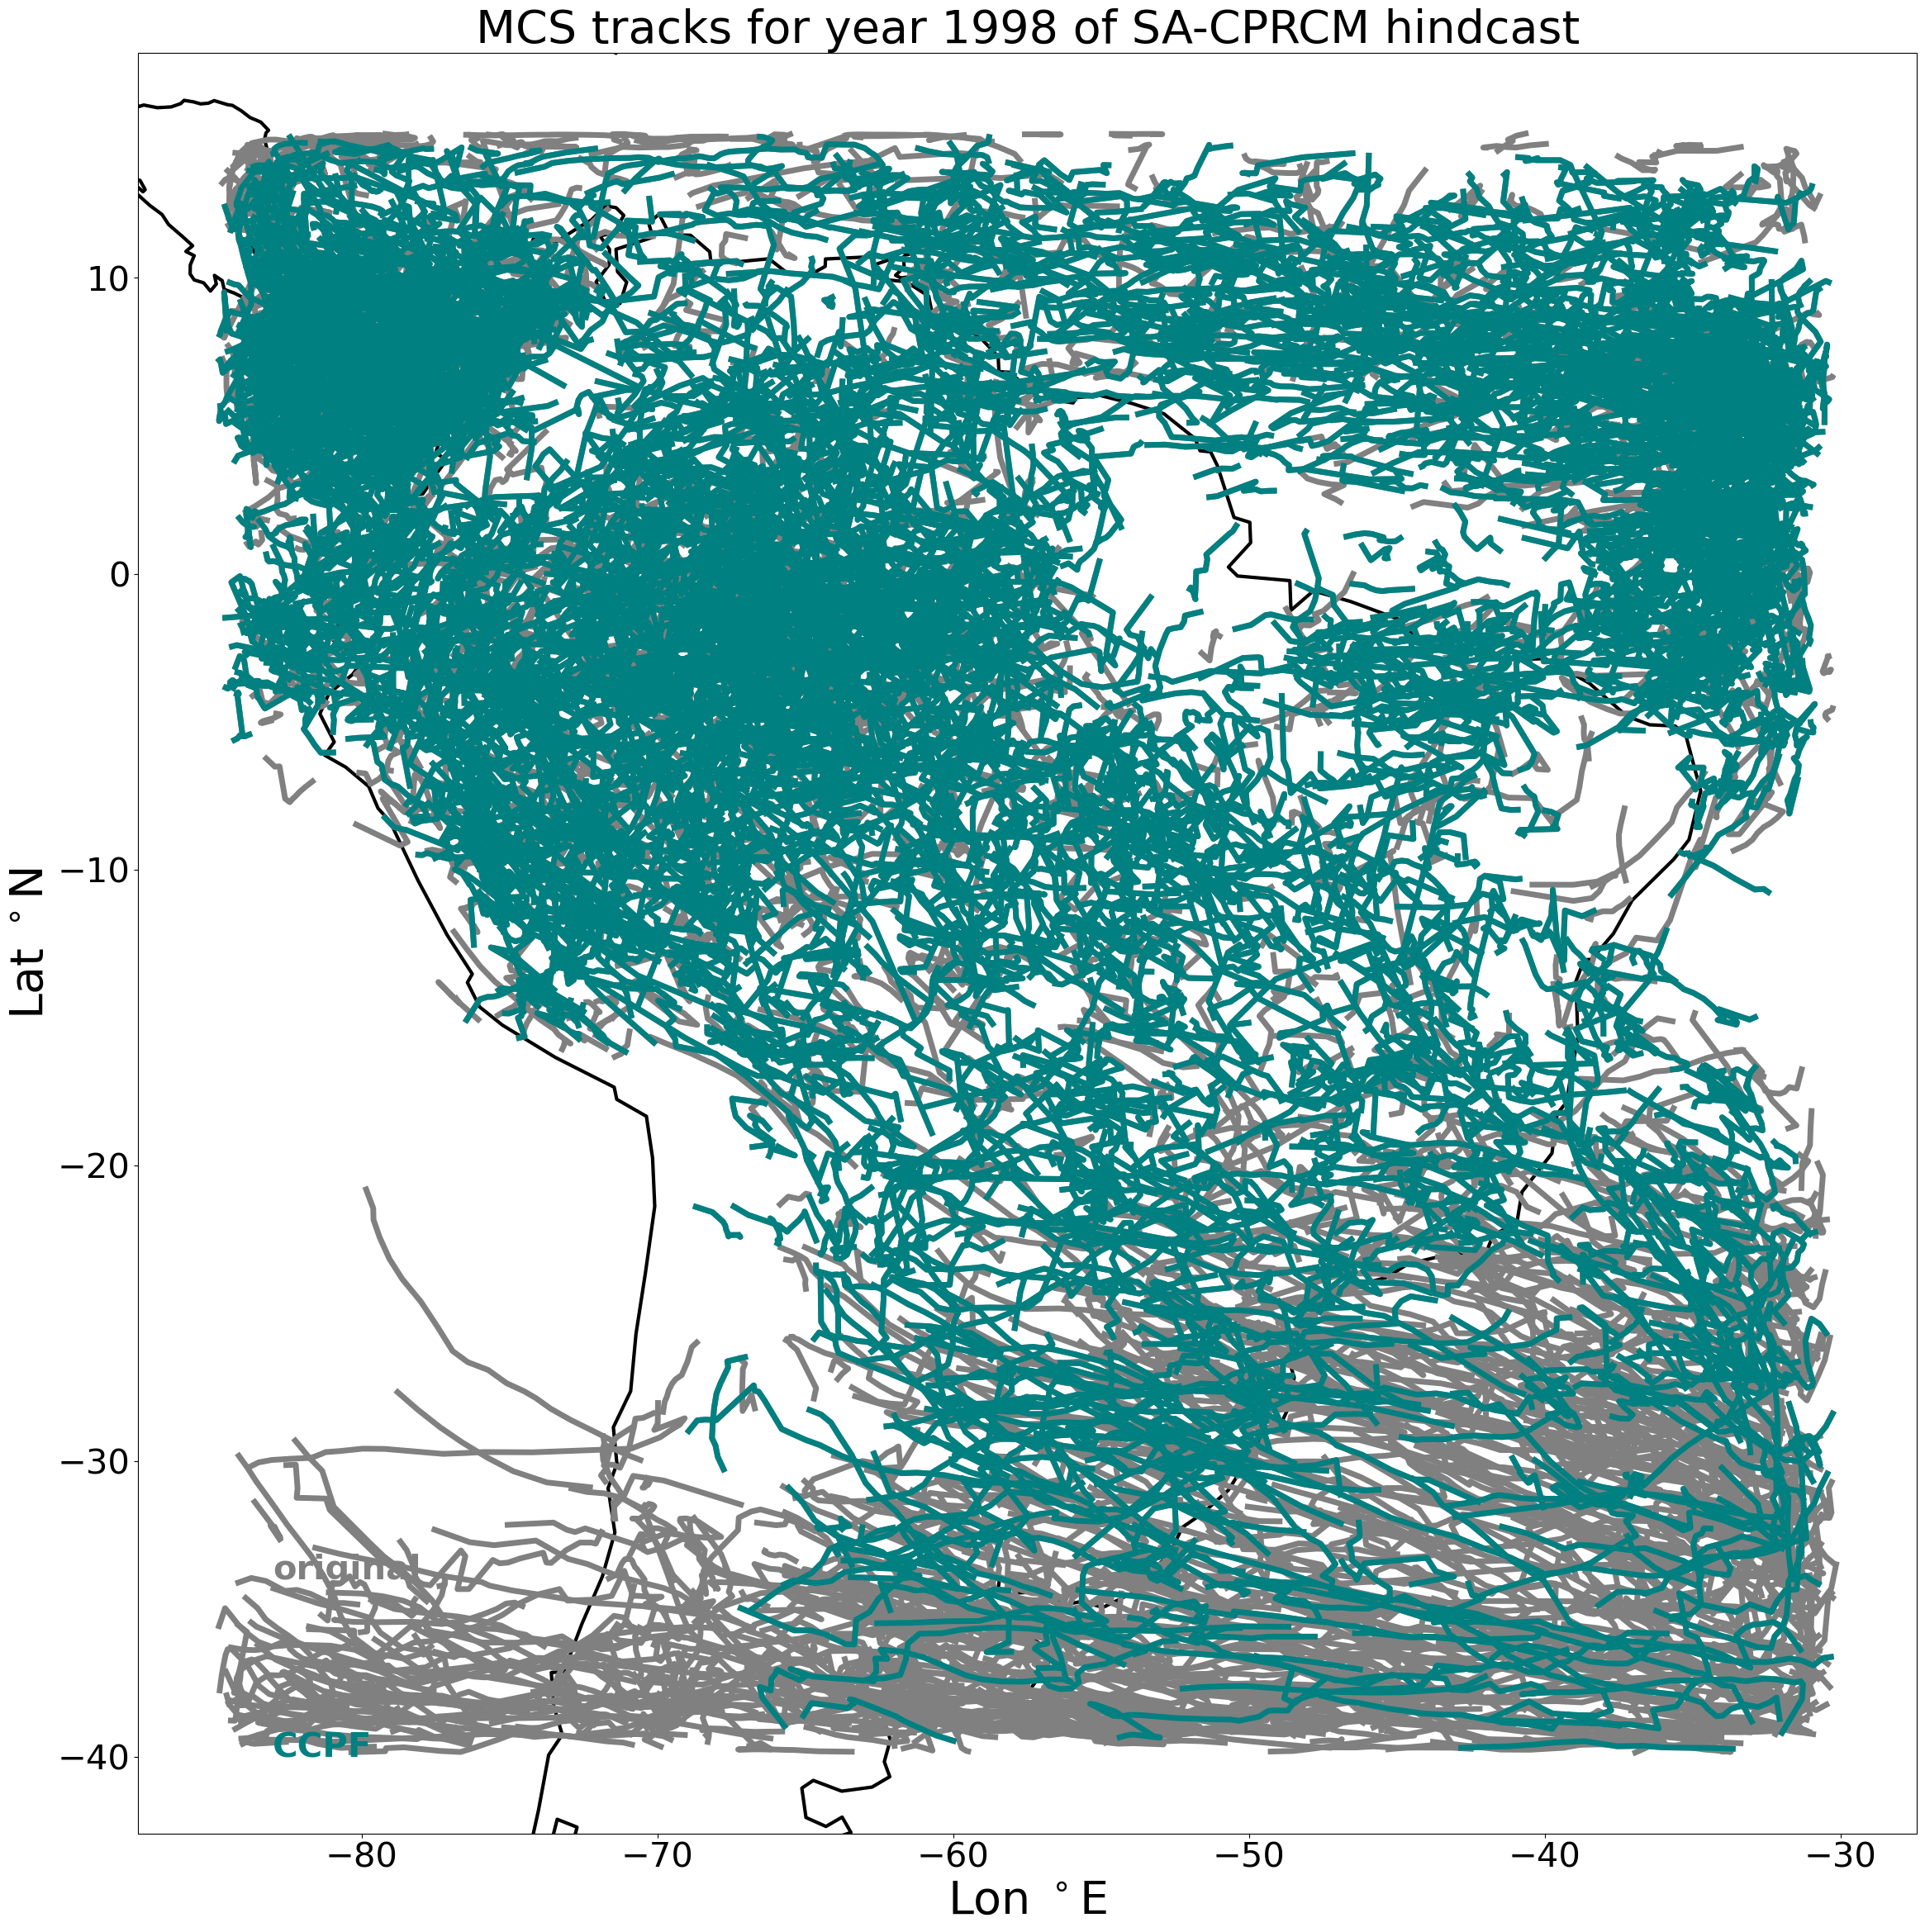

In [24]:
#plots for each timestep:
#========================

axis_extent=[-80,-30,-35,12]

plt.figure()

fig_map,ax_map=plt.subplots(figsize=(30,28),subplot_kw={'projection': ccrs.PlateCarree()})
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    plt.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=5,zorder=2, color='grey')

for cell in CCPF['cell'].dropna().unique(): # filtered tracks when cold core = 200K
    if cell == -1:
        continue
    CCPF_i = CCPF[CCPF['cell'] == cell]
    plt.plot(CCPF_i['longitude'],CCPF_i['latitude'], '-',linewidth=5,zorder=2, color='teal')

plt.text(-83,-34, "original",fontsize=30,color='grey',weight='bold')
plt.text(-83,-40, "CCPF",fontsize=30,color='teal',weight='bold')

plt.gca().coastlines(linewidth=3)

plt.xticks([-80,-70,-60,-50,-40,-30],fontsize=30)
plt.yticks([-40,-30,-20,-10,0,10],fontsize=30)
plt.xlabel('Lon $^\circ$E', fontsize=40)
plt.ylabel('Lat $^\circ$N', fontsize=40)

plt.title("MCS tracks for year {} of SA-CPRCM hindcast".format(year),fontsize=40)

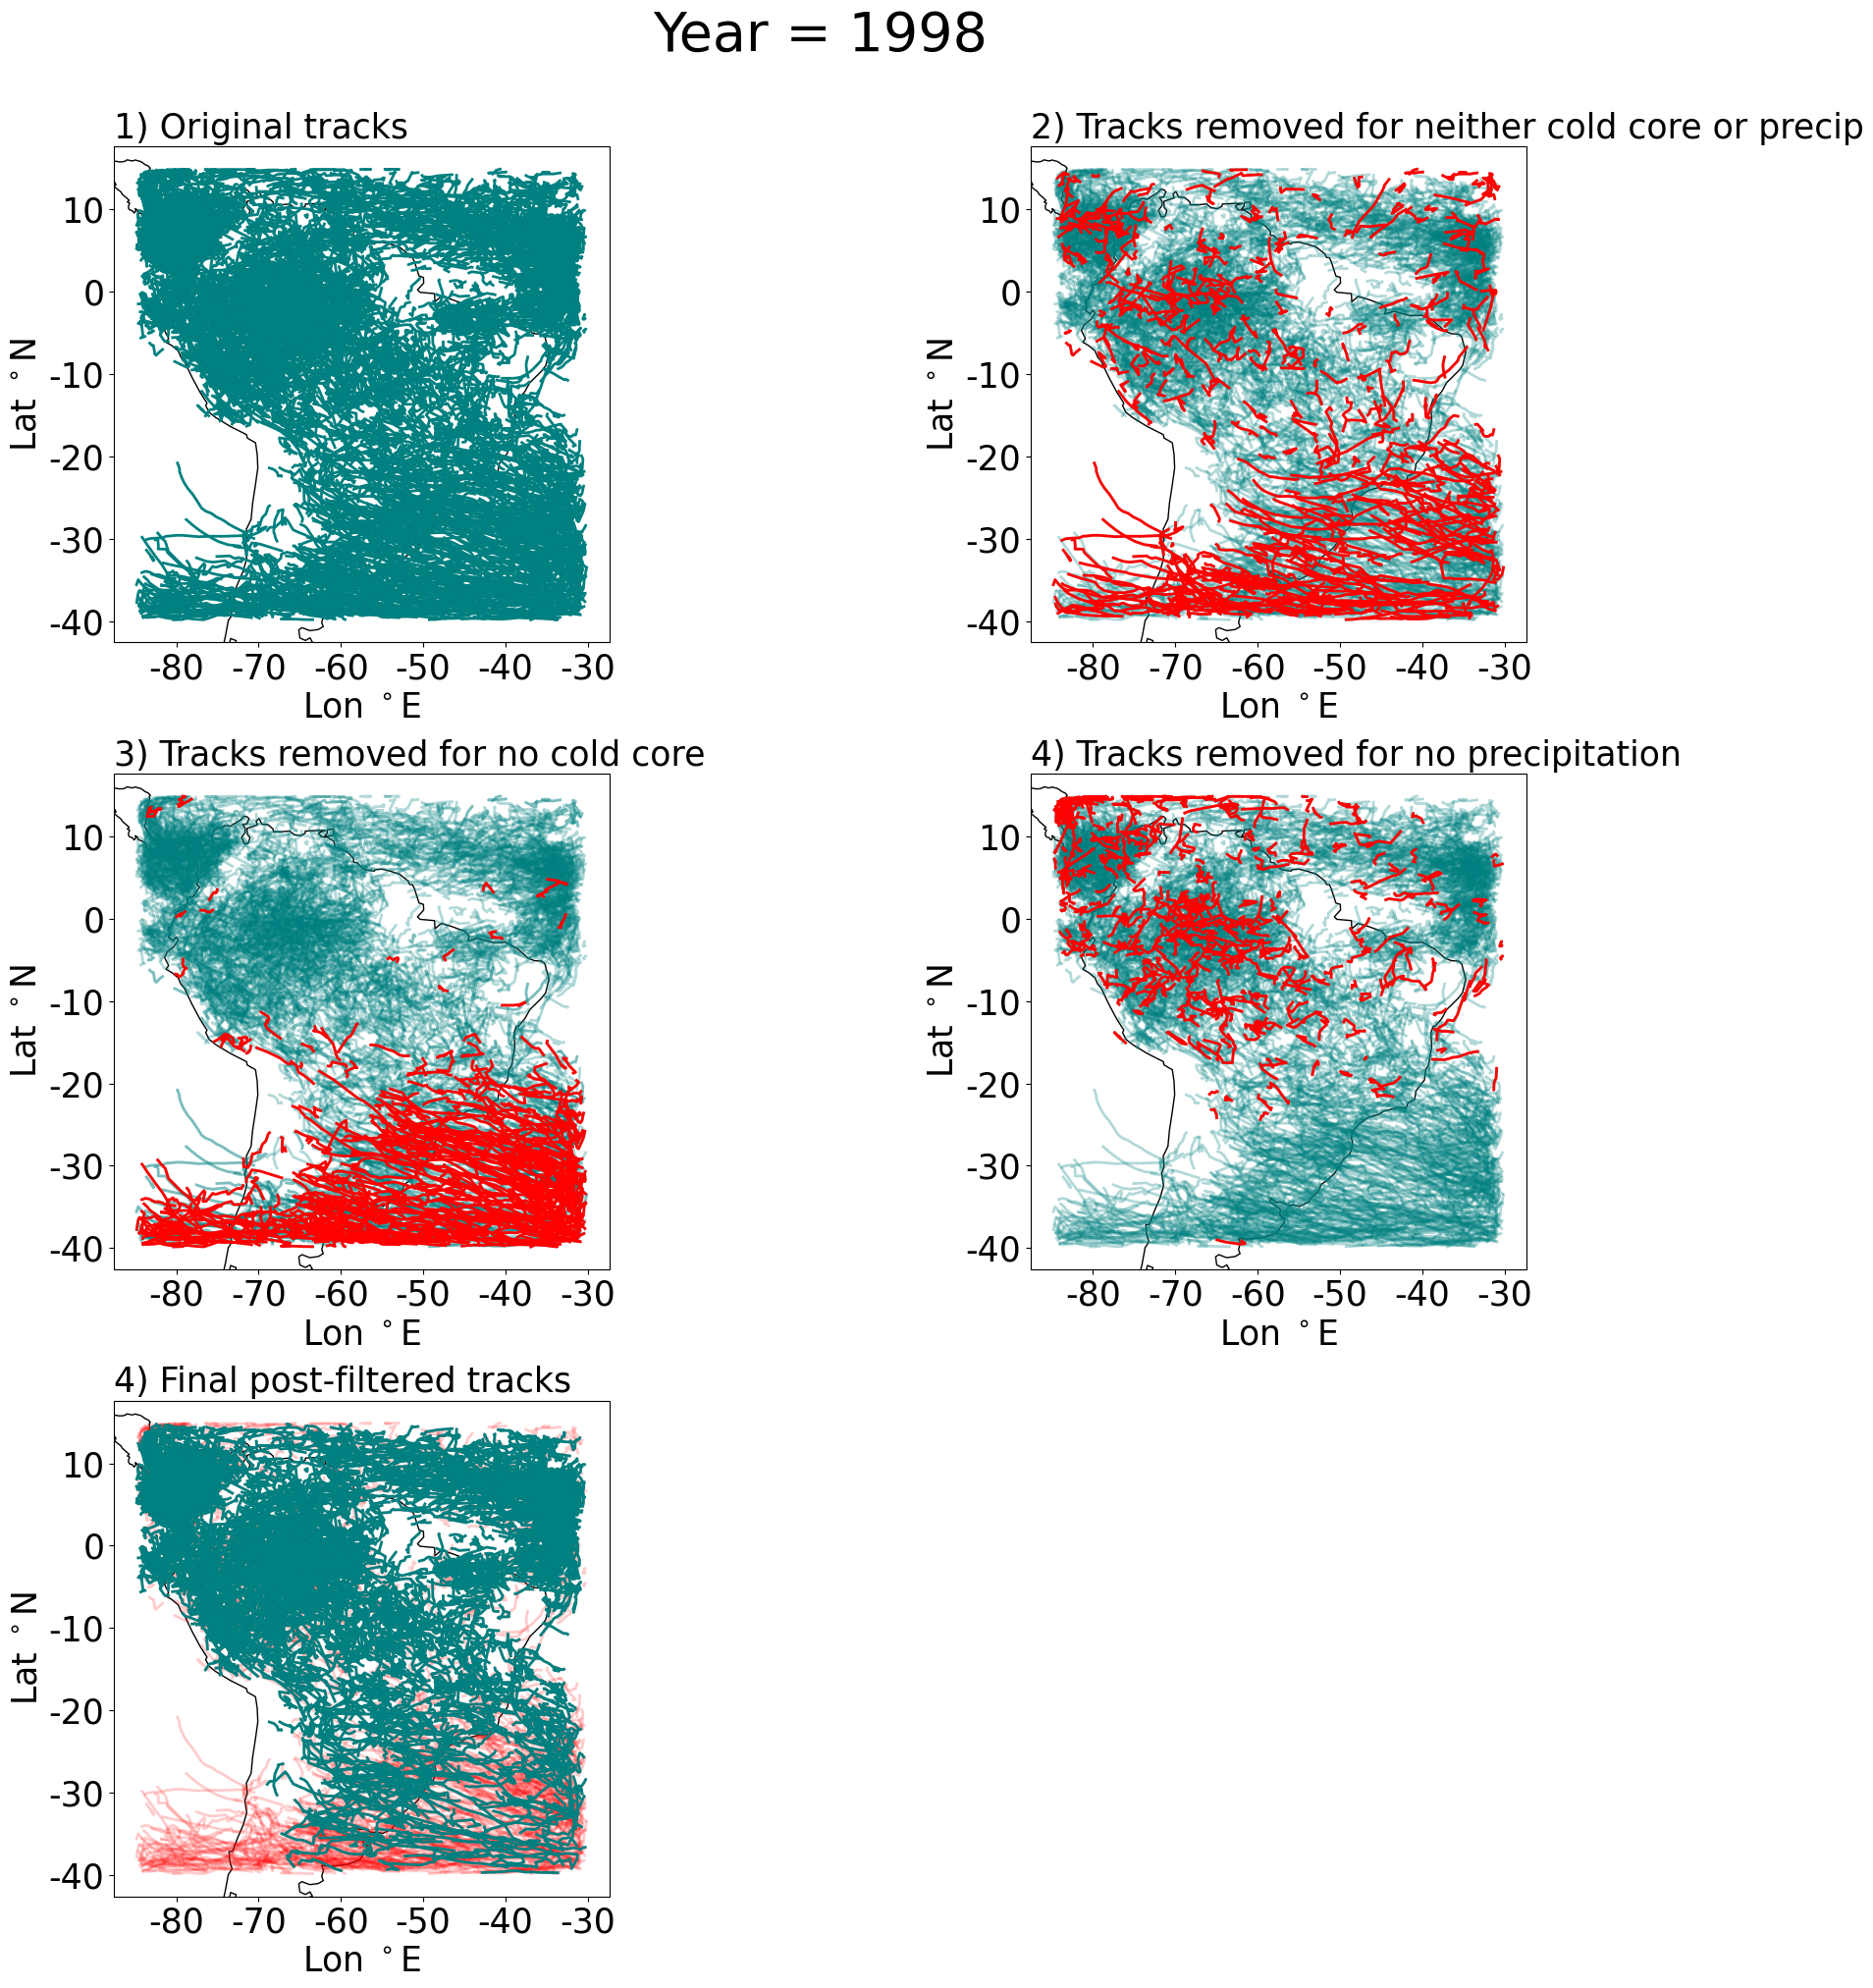

In [25]:
# subplots showing the removal of tracks depending on criteria
# ============================================================

axis_extent=[-80,-30,-35,12]

fig = plt.figure(figsize=(20,20))

ax1 = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
ax1.set_title('1) Original tracks', loc='left', fontsize= 25 )
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    ax1.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=2,zorder=2, color='teal')
ax1.coastlines(linewidth=1)
ax1.set_xticks([-80,-70,-60,-50,-40,-30])
ax1.set_yticks([-40,-30,-20,-10,0,10])
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax1.set_xlabel('Lon $^\circ$E', fontsize=25)
ax1.set_ylabel('Lat $^\circ$N', fontsize=25)


ax2 = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
ax2.set_title('2) Tracks removed for neither cold core or precip', loc='left', fontsize= 25 )
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    ax2.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=2,zorder=2, color='teal', alpha=0.3)
for cell in no_CCPF['cell'].dropna().unique():
    if cell == -1:
        continue
    no_CCPF_i = no_CCPF[no_CCPF['cell'] == cell]
    ax2.plot(no_CCPF_i['longitude'],no_CCPF_i['latitude'], '-',linewidth=2,zorder=2, color='red')
ax2.coastlines(linewidth=1)
ax2.set_xticks([-80,-70,-60,-50,-40,-30])
ax2.set_yticks([-40,-30,-20,-10,0,10])
ax2.set_xticklabels(ax2.get_xticks().astype(int),fontsize=25)
ax2.set_yticklabels(ax2.get_yticks().astype(int),fontsize=25)
ax2.set_xlabel('Lon $^\circ$E', fontsize=25)
ax2.set_ylabel('Lat $^\circ$N', fontsize=25)


ax3 = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax3.set_title('3) Tracks removed for no cold core', loc='left', fontsize= 25 )
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    ax3.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=2,zorder=2, color='teal',alpha=0.3)
for cell in no_CCPF['cell'].dropna().unique():
    if cell == -1:
        continue
    no_CCPF_i = no_CCPF[no_CCPF['cell'] == cell]
    ax3.plot(no_CCPF_i['longitude'],no_CCPF_i['latitude'], '-',linewidth=2,zorder=2, color='teal', alpha=0.3)
for cell in no_CC['cell'].dropna().unique():
    if cell == -1:
        continue
    no_CC_i = no_CC[no_CC['cell'] == cell]
    ax3.plot(no_CC_i['longitude'],no_CC_i['latitude'], '-',linewidth=2,zorder=2, color='red')
ax3.coastlines(linewidth=1)
ax3.set_xticks([-80,-70,-60,-50,-40,-30])
ax3.set_yticks([-40,-30,-20,-10,0,10])
ax3.set_xticklabels(ax3.get_xticks().astype(int),fontsize=25)
ax3.set_yticklabels(ax3.get_yticks().astype(int),fontsize=25)
ax3.set_xlabel('Lon $^\circ$E', fontsize=25)
ax3.set_ylabel('Lat $^\circ$N', fontsize=25)


ax4 = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree())
ax4.set_title('4) Tracks removed for no precipitation', loc='left', fontsize= 25 )
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    ax4.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=2,zorder=2, color='teal', alpha=0.3)
for cell in no_precip['cell'].dropna().unique():
    if cell == -1:
        continue
    no_precip_i = no_precip[no_precip['cell'] == cell]
    ax4.plot(no_precip_i['longitude'],no_precip_i['latitude'], '-',linewidth=2,zorder=2, color='red')
ax4.coastlines(linewidth=1)
ax4.set_xticks([-80,-70,-60,-50,-40,-30])
ax4.set_yticks([-40,-30,-20,-10,0,10])
ax4.set_xticklabels(ax4.get_xticks().astype(int),fontsize=25)
ax4.set_yticklabels(ax4.get_yticks().astype(int),fontsize=25)
ax4.set_xlabel('Lon $^\circ$E', fontsize=25)
ax4.set_ylabel('Lat $^\circ$N', fontsize=25)


ax5 = plt.subplot(3, 2, 5, projection=ccrs.PlateCarree())
ax5.set_title('4) Final post-filtered tracks', loc='left', fontsize= 25 )
for cell in original['cell'].dropna().unique():
    if cell == -1:
        continue
    original_i = original[original['cell'] == cell]
    ax5.plot(original_i['longitude'],original_i['latitude'], '-',linewidth=2,zorder=2, color='red', alpha=0.2)
for cell in CCPF['cell'].dropna().unique():
    if cell == -1:
        continue
    CCPF_i = CCPF[CCPF['cell'] == cell]
    ax5.plot(CCPF_i['longitude'],CCPF_i['latitude'], '-',linewidth=2,zorder=2, color='teal')

ax5.coastlines(linewidth=1)
ax5.set_xticks([-80,-70,-60,-50,-40,-30])
ax5.set_yticks([-40,-30,-20,-10,0,10])
ax5.set_xticklabels(ax5.get_xticks().astype(int),fontsize=25)
ax5.set_yticklabels(ax5.get_yticks().astype(int),fontsize=25)
ax5.set_xlabel('Lon $^\circ$E', fontsize=25)
ax5.set_ylabel('Lat $^\circ$N', fontsize=25)

plt.suptitle('Year = {}'.format(year),fontsize=40, y=1.01)
fig.tight_layout()


In [26]:
dataframes= [CCPF, original]

for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0]) 
    set(df['datetime'])

In [27]:
# plot of initiation and dissipation times
# ========================================
import functions

#filtered (CC=210K)
init_hours_filtered = functions.get_mcs_init(CCPF)
init_hours_filtered = np.array(init_hours_filtered)
init_hours_filtered, bins = np.histogram(init_hours_filtered, bins = np.arange(0,25))

diss_hours_filtered = functions.get_mcs_diss(CCPF)
diss_hours_filtered = np.array(diss_hours_filtered)
diss_hours_filtered, bins = np.histogram(diss_hours_filtered, bins = np.arange(0,25))

init_filtered = init_hours_filtered/np.nansum(init_hours_filtered) * 100
diss_filtered = diss_hours_filtered/np.nansum(diss_hours_filtered) * 100

max_hours_rain_filtered = functions.get_mcs_max_precip(CCPF)

max_hours_tb_filtered = functions.get_mcs_min_tb(CCPF)


#unfiltered
init_hours_unfiltered = functions.get_mcs_init(original)
init_hours_unfiltered = np.array(init_hours_unfiltered)
init_hours_unfiltered, bins = np.histogram(init_hours_unfiltered, bins = np.arange(0,25))

diss_hours_unfiltered = functions.get_mcs_diss(original)
diss_hours_unfiltered = np.array(diss_hours_unfiltered)
diss_hours_unfiltered, bins = np.histogram(diss_hours_unfiltered, bins = np.arange(0,25))

init_unfiltered = init_hours_unfiltered/np.nansum(init_hours_unfiltered) * 100
diss_unfiltered = diss_hours_unfiltered/np.nansum(diss_hours_unfiltered) * 100


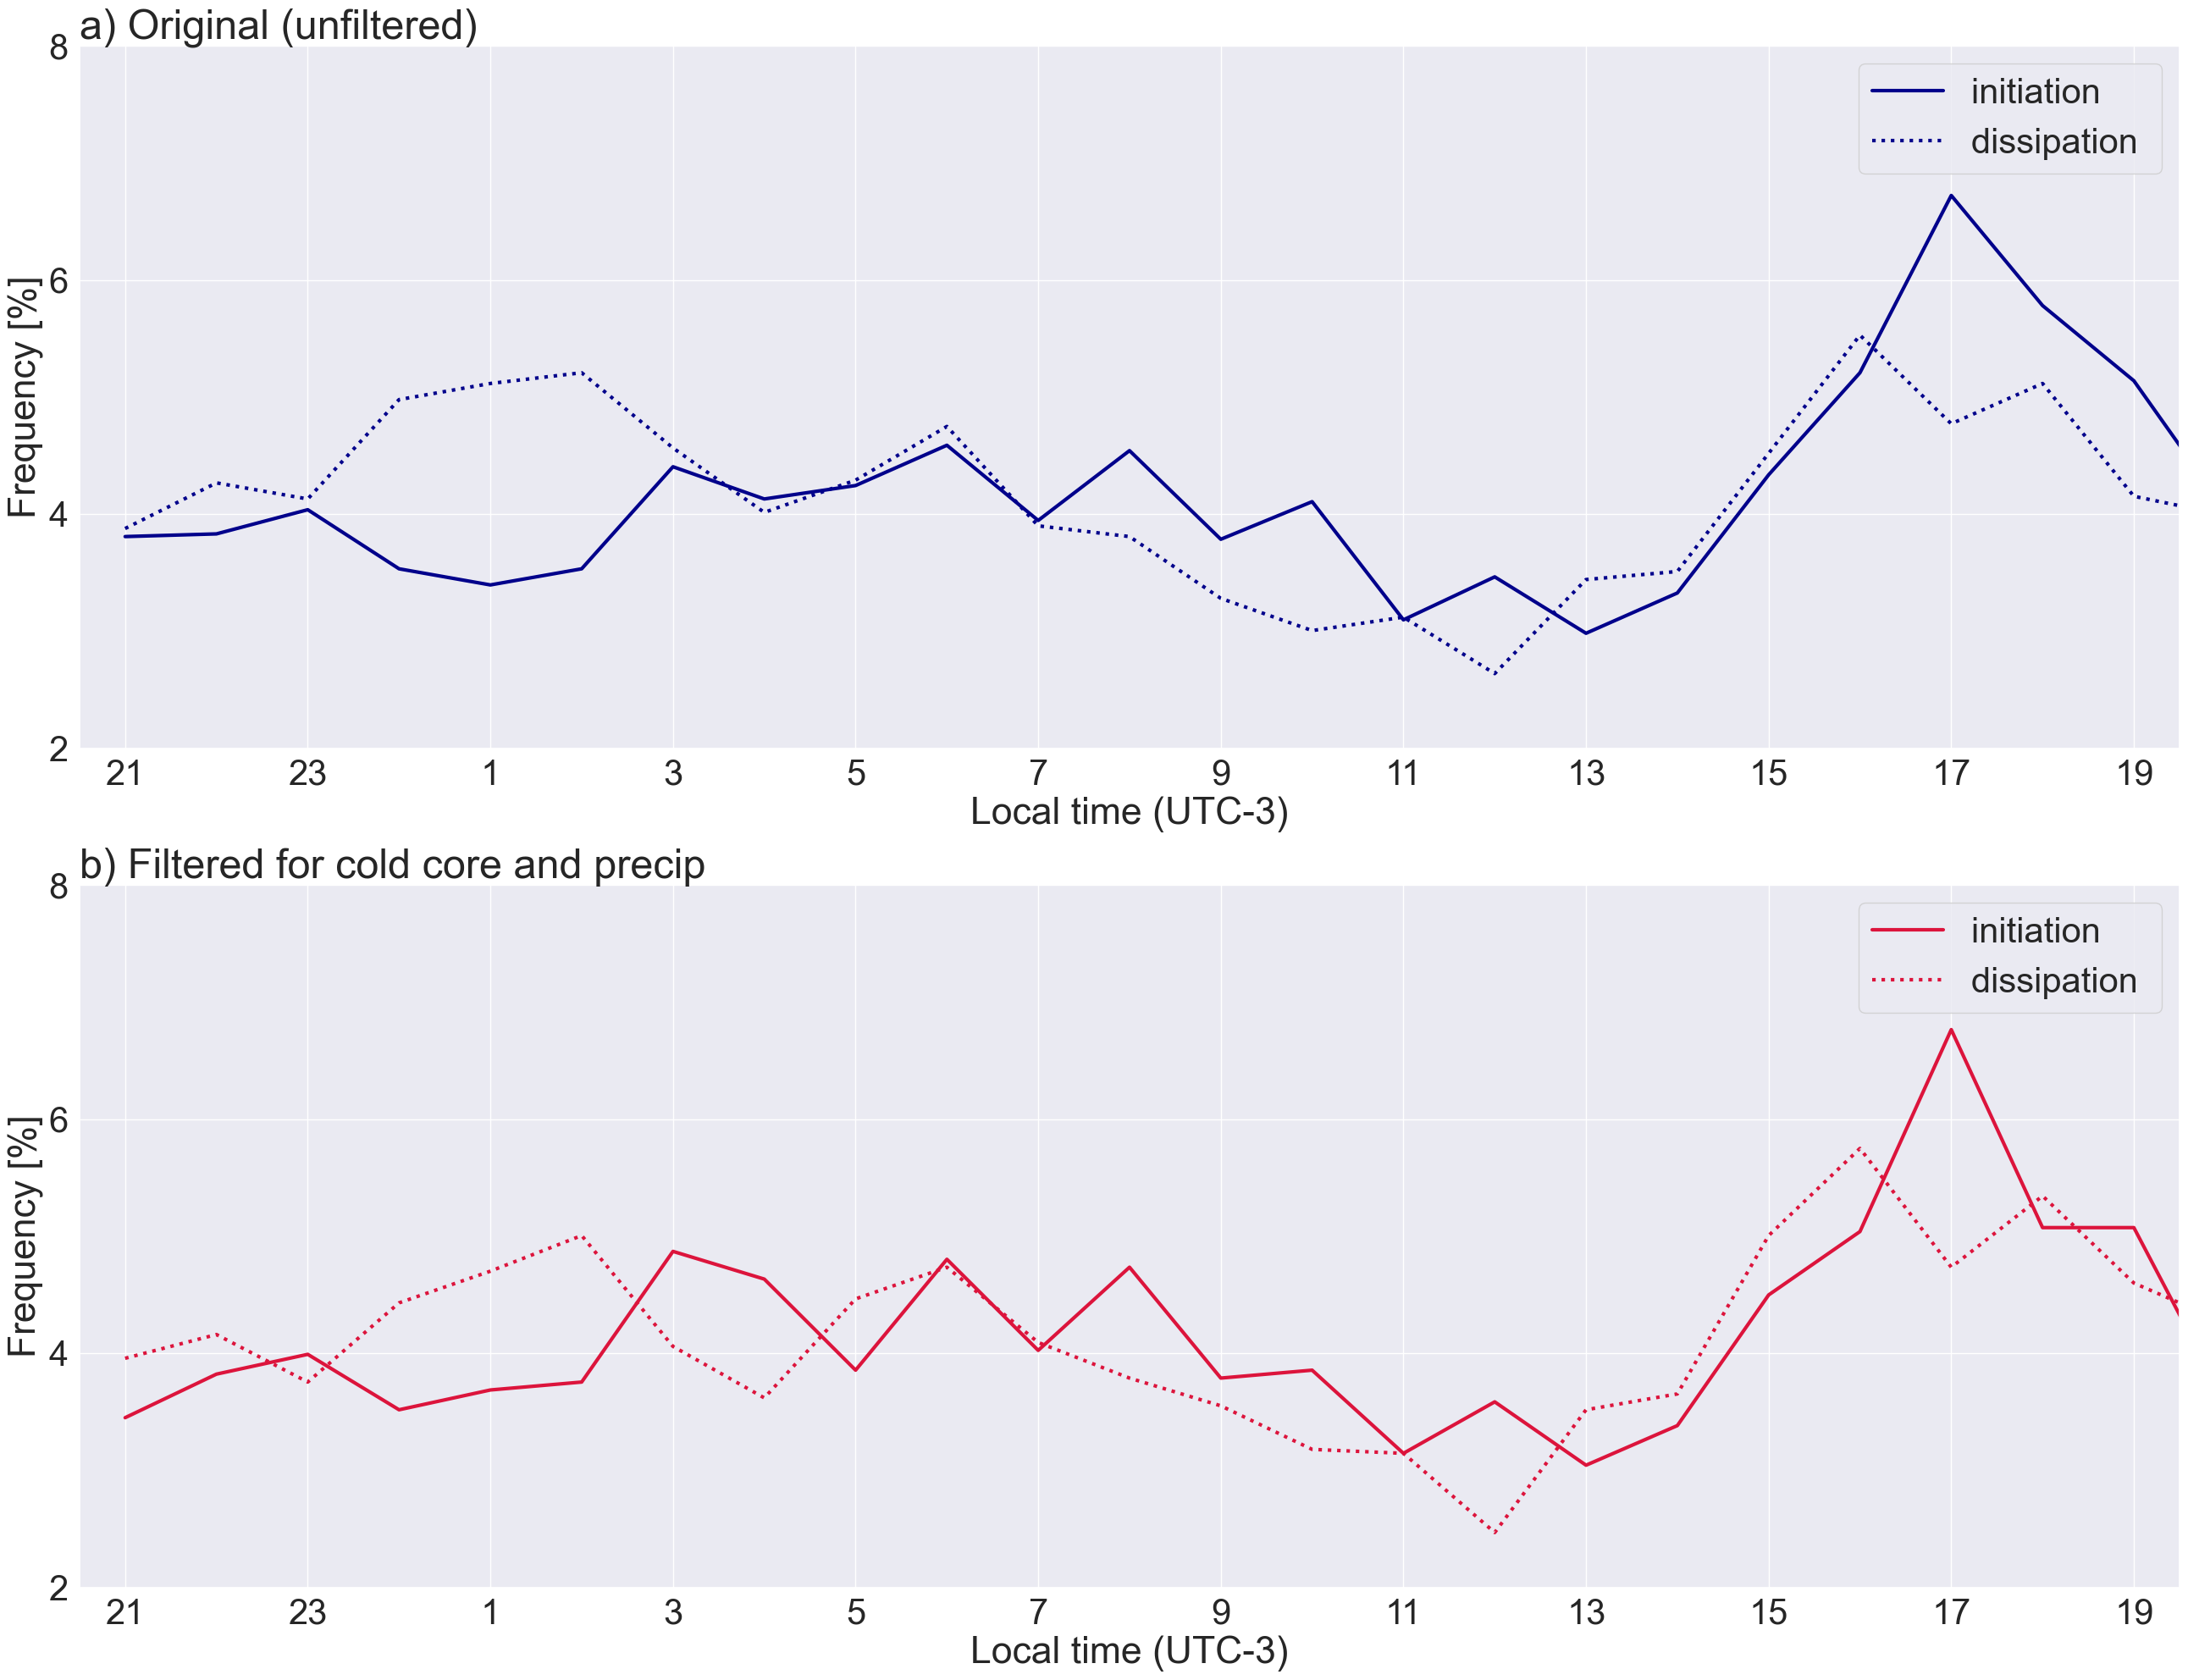

In [28]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,20))
f= 30
lf= 30
l=32

ax1 = plt.subplot(2, 1, 1) 
ax1.set_title('a) Original (unfiltered) ', loc='left', fontsize= 35 )
ax1.plot(np.arange(0,24), init_unfiltered, label = 'initiation ', color= 'darkblue', linewidth = 3)
ax1.plot(np.arange(0,24), diss_unfiltered, label = 'dissipation ', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
#ax1.plot(np.arange(0,24), max_hours_rain_unfiltered, label = 'rain_maxima ', color= 'darkblue', linewidth = 3, linestyle = '-')
#ax1.plot(np.arange(0,24), max_hours_tb_unfiltered, label = 'tb_minima ', color= 'darkblue', linewidth = 3, linestyle = '-,')
ax1.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
ax1.set_yticks(np.arange(2,10,2))
ax1.set_xticks(np.arange(0,23)[::2])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=f)
ax1.set_xticklabels(labels,fontsize= f)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Local time (UTC-3)', fontsize= l)
ax1.set_ylabel('Frequency [%]', fontsize= l)


labels=localtime.astype(str)
ax2 = plt.subplot(2, 1, 2) 
ax2.set_title('b) Filtered for cold core and precip', loc='left', fontsize= 35 )
ax2.plot(np.arange(0,24), init_filtered, label = 'initiation ', color= 'crimson', linewidth = 3)
ax2.plot(np.arange(0,24), diss_filtered, label = 'dissipation ', color= 'crimson', linewidth = 3, linestyle = 'dotted')
#ax2.plot(np.arange(0,24), max_hours_rain_filtered, label = 'rain_maxima ', color= 'crimson', linewidth = 3, linestyle = '-.',alpha=0.5)
#ax2.plot(np.arange(0,24), max_hours_tb_filtered, label = 'tb_minima ', color= 'crimson', linewidth = 3, linestyle = '--',alpha=0.5)

ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,10,2))
ax2.set_xticks(np.arange(0,23)[::2])
ax2.set_xticklabels(labels,fontsize= f)
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=f)
ax2.set_xlabel('Local time (UTC-3)', fontsize= l)
ax2.set_ylabel('Frequency [%]', fontsize= l)

plt.tight_layout()



In [29]:
init_lats_unfiltered, init_lons_unfiltered, diss_lats_unfiltered, diss_lons_unfiltered = functions.get_init(original)
init_lats_filtered, init_lons_filtered, diss_lats_filtered, diss_lons_filtered = functions.get_init(CCPF)

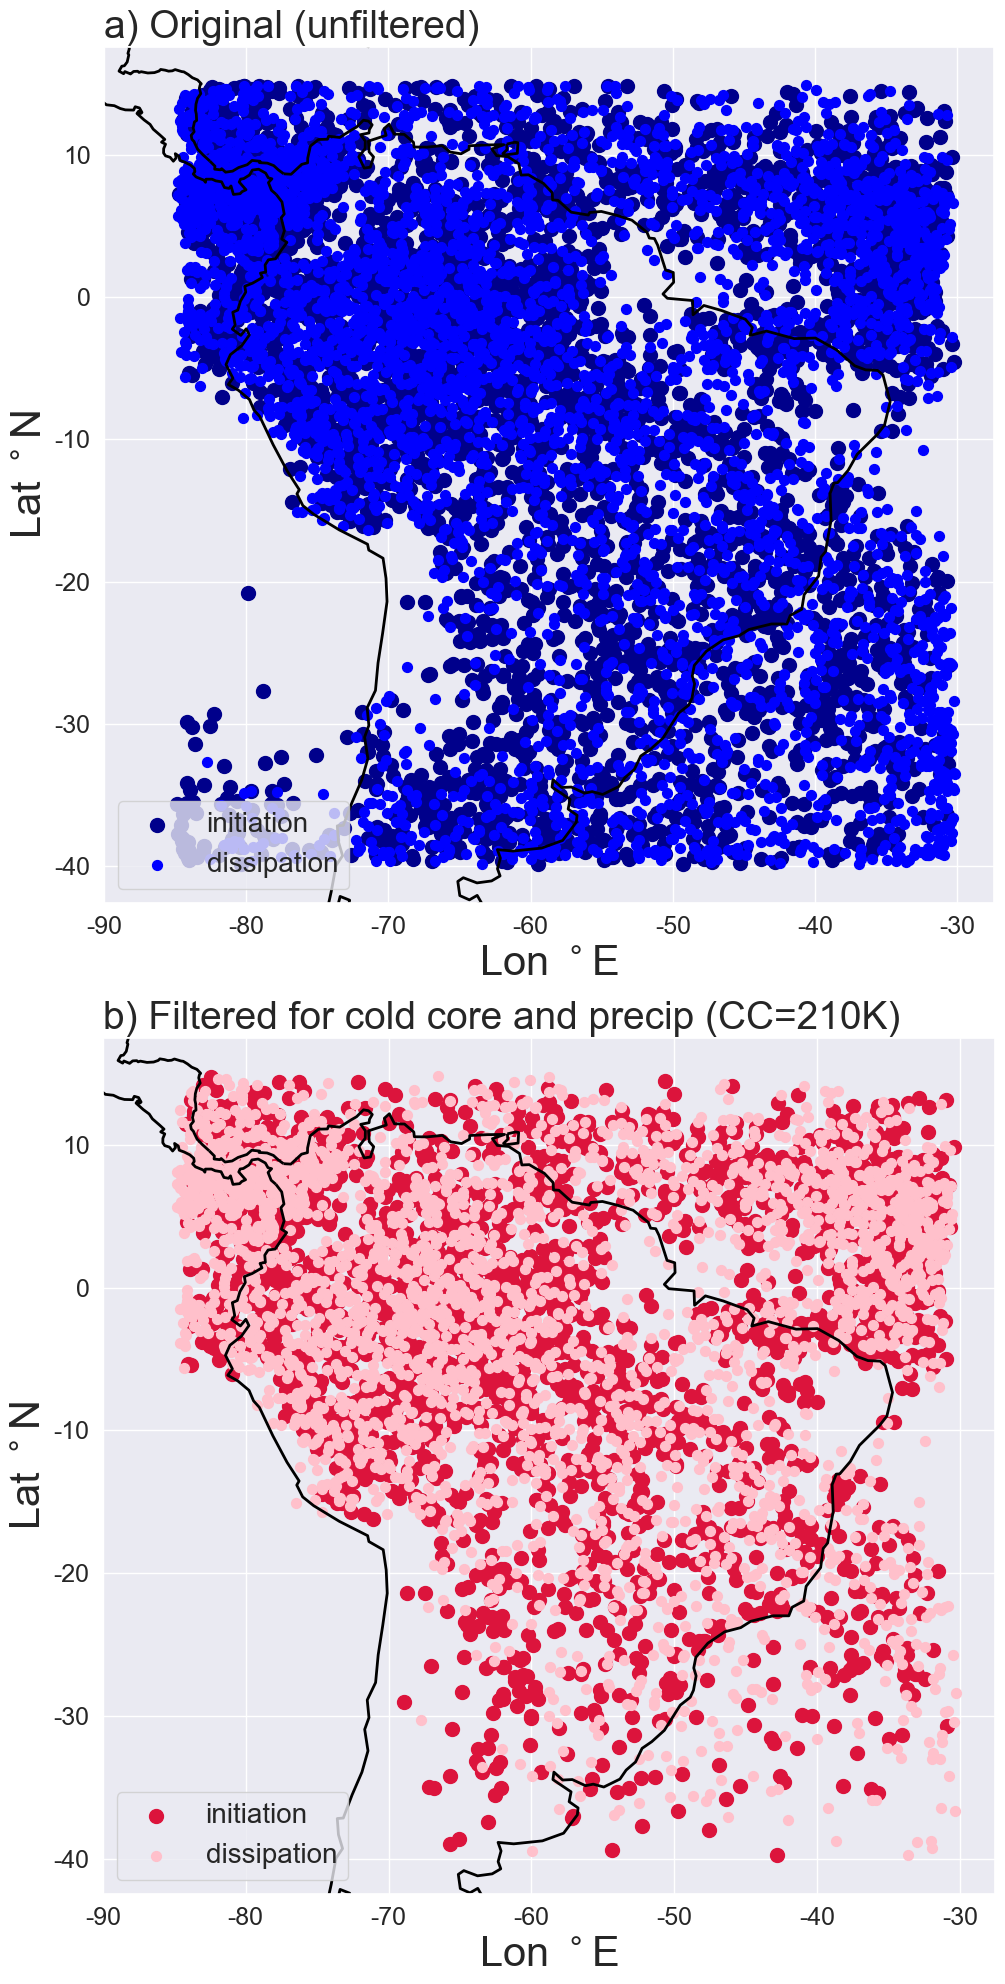

In [30]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(25,20))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
#fontsize
f=28

plt.subplots_adjust(wspace=0,hspace=0)
# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) Original (unfiltered)', loc='left', fontsize= f )
ax1.scatter(init_lons_unfiltered, init_lats_unfiltered,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_unfiltered, diss_lats_unfiltered,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines(linewidth=2)
ax1.legend(fontsize= 20)
ax1.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax1.set_yticks([-40,-30,-20,-10,0,10])
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=18)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=18)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) Filtered for cold core and precip (CC=210K) ', loc='left', fontsize= f )
ax2.scatter(init_lons_filtered, init_lats_filtered,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_filtered, diss_lats_filtered,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines(linewidth=2)
ax2.legend(fontsize= 20)
ax2.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax2.set_yticks([-40,-30,-20,-10,0,10])
ax2.set_xticklabels(ax2.get_xticks().astype(int),fontsize=18)
ax2.set_yticklabels(ax2.get_yticks().astype(int),fontsize=18)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)


fig.tight_layout()


In [31]:
# MCS area plots
# ==============
area_unfiltered=functions.get_area(original)
area_filtered=functions.get_area(CCPF)

array of MCS areas generated.
array of MCS areas generated.


In [32]:
u_area_histo, bins = np.histogram(area_unfiltered, bins= np.linspace(60000,420000,10))
f_area_histo, bins = np.histogram(area_filtered, bins= np.linspace(60000,420000,10))

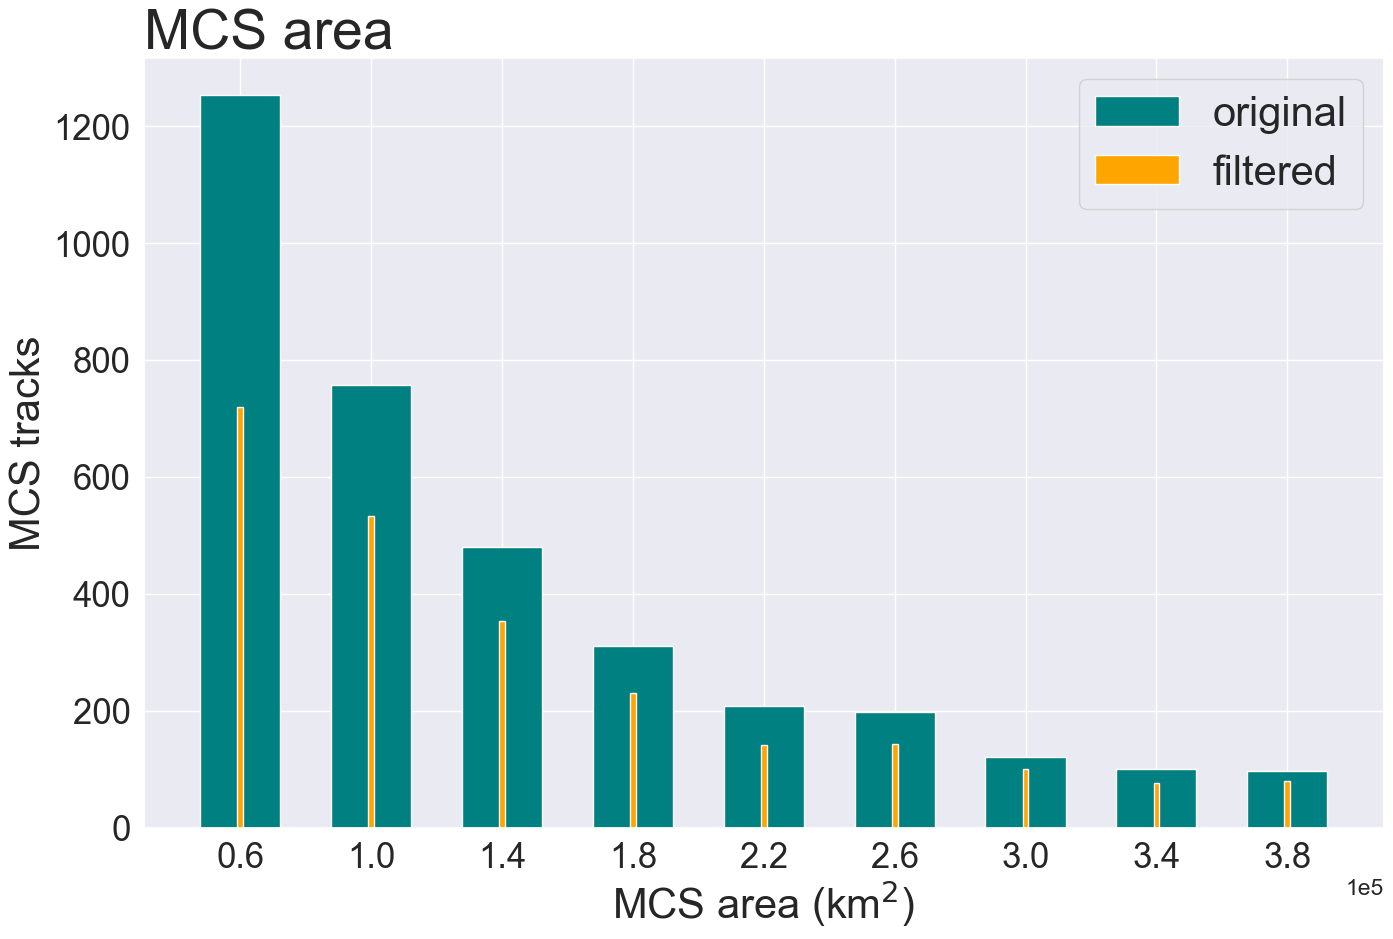

In [33]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS area', loc='left', fontsize= t )
plt.bar(bins[:-1],u_area_histo,width=35000*0.7,color= 'teal', label='original')
plt.xlabel('MCS area (km$^{2}$)', fontsize= f)
plt.xticks(bins.astype(int)[:-1], fontsize=n)
#plt.xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000], fontsize=n)
#plt.yticks(np.arange(0,140)[::10],fontsize=n)
#plt.yticks([0,20,40,60,80,100],fontsize=n)
plt.yticks(fontsize=n)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#ax1.xaxis.get_offset_text().set_fontsize(25)
plt.ylabel('MCS tracks',fontsize=f)

plt.bar(bins[:-1],f_area_histo, width=35000*0.05,color= 'orange',label='filtered')

plt.legend(loc='best',fontsize=f)
fig.tight_layout()



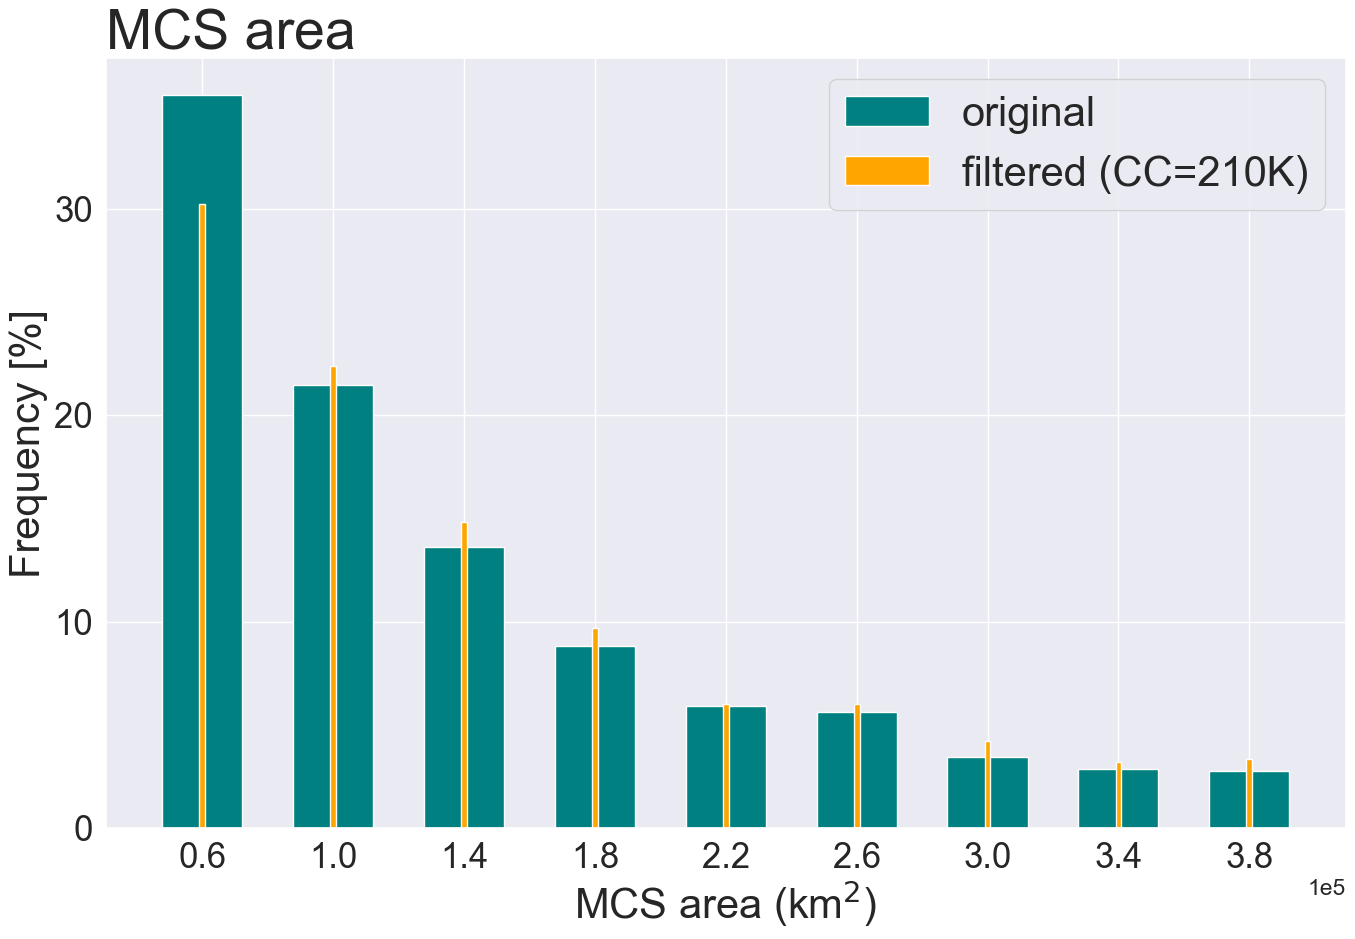

In [34]:
u_area_hist = u_area_histo/np.nansum(u_area_histo) * 100
f_area_hist = f_area_histo/np.nansum(f_area_histo) * 100


#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS area', loc='left', fontsize= t )
plt.bar(bins[:-1],u_area_hist,width=35000*0.7,color= 'teal', label='original')
plt.xlabel('MCS area (km$^{2}$)', fontsize= f)
plt.xticks(bins.astype(int)[:-1], fontsize=n)
#plt.xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000], fontsize=n)
plt.yticks(np.arange(0,140)[::10],fontsize=n)
#plt.yticks([0,20,40,60,80,100],fontsize=n)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#ax1.xaxis.get_offset_text().set_fontsize(25)
plt.ylabel('Frequency [%]',fontsize=f)

plt.bar(bins[:-1],f_area_hist, width=35000*0.05,color= 'orange',label='filtered (CC=210K)')

plt.legend(loc='best',fontsize=f)
fig.tight_layout()



In [35]:
# plots for velocity
# ==================

import tobac

#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_unfiltered= tobac.calculate_velocity(original, method_distance=None)
vel_filtered = tobac.calculate_velocity(CCPF, method_distance=None)

/home/h03/hgilmour/.conda/envs/myclone/lib/python3.9/site-packages/tobac/analysis.py:572: RuntimeWarning: divide by zero encountered in double_scalars
  velocity = distance / diff_time
/home/h03/hgilmour/.conda/envs/myclone/lib/python3.9/site-packages/tobac/analysis.py:572: RuntimeWarning: divide by zero encountered in double_scalars
  velocity = distance / diff_time


In [36]:
CCPF[CCPF.cell == 2]

Empty DataFrame
Columns: [frame, idx, hdim_1, hdim_2, num, threshold_value, feature, time, timestr, latitude, longitude, cell, time_cell, total_precip, rain_flag, convective_precip, heavy_precip, extreme_precip, heavy_rain_flag, extreme_rain_flag, max_precip, mean_precip_total, mean_precip, tb_min, tb_mean, tb_210, tb_200, tb_190, tb_180, w_max, w_min, w_mean, w_mean_up, w_mean_down, w_up_area, w_down_area, w_0.1_up, w_1_up, w_5_up, w_0.1_down, w_1_down, w_5_down, datetime, max_precip_lat, max_precip_lon, min_tb_lat, min_tb_lon, max_w_up_lat, max_w_up_lon, max_w_down_lat, max_w_down_lon, colocated_pixels, hour, v]
Index: []

[0 rows x 54 columns]

In [37]:
velocity_unfiltered = functions.get_v(vel_unfiltered)
velocity_filtered = functions.get_v(vel_filtered)

propagation speed histo calculated.
propagation speed histo calculated.


In [38]:
velocity_filtered

array([23.56243245,  8.66783838,  6.1031129 , ..., 22.00630011,
       11.70198369,  5.89052314])

In [39]:
u_histo, bins = np.histogram(velocity_unfiltered, bins= np.linspace(1,37,13))
f_histo, bins = np.histogram(velocity_filtered, bins= np.linspace(1,37, 13))

In [40]:
u_histo

array([ 96, 393, 768, 970, 880, 603, 329, 139,  95,  39,  25,   8])

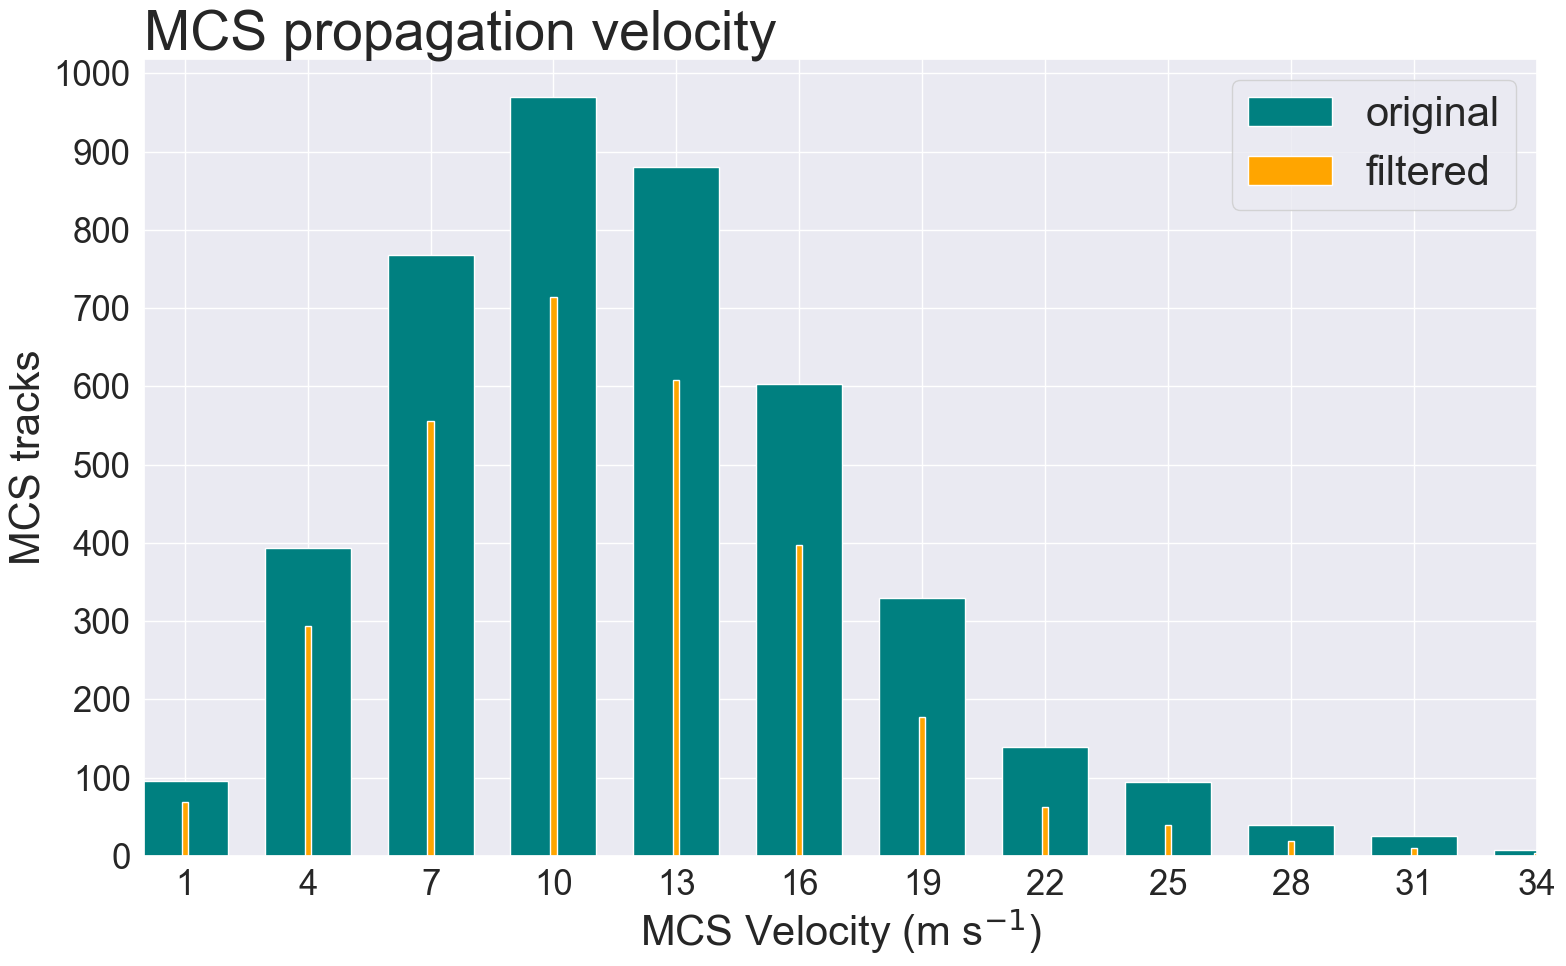

In [41]:
#plots of MCS velocity
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS propagation velocity', loc='left', fontsize= t)
plt.bar(bins[:-1], u_histo, color='teal', width = 3*0.7, label='original')
plt.xlim(0,30)
plt.xticks(bins.astype(int)[:-1],fontsize=n)
plt.yticks(np.arange(0,1300)[::100], fontsize=n)
plt.xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
plt.ylabel('MCS tracks',fontsize=f)

plt.bar(bins[:-1], f_histo,color='orange',width=3*0.05,label='filtered')



plt.legend(loc='best', fontsize=30)
plt.tight_layout()




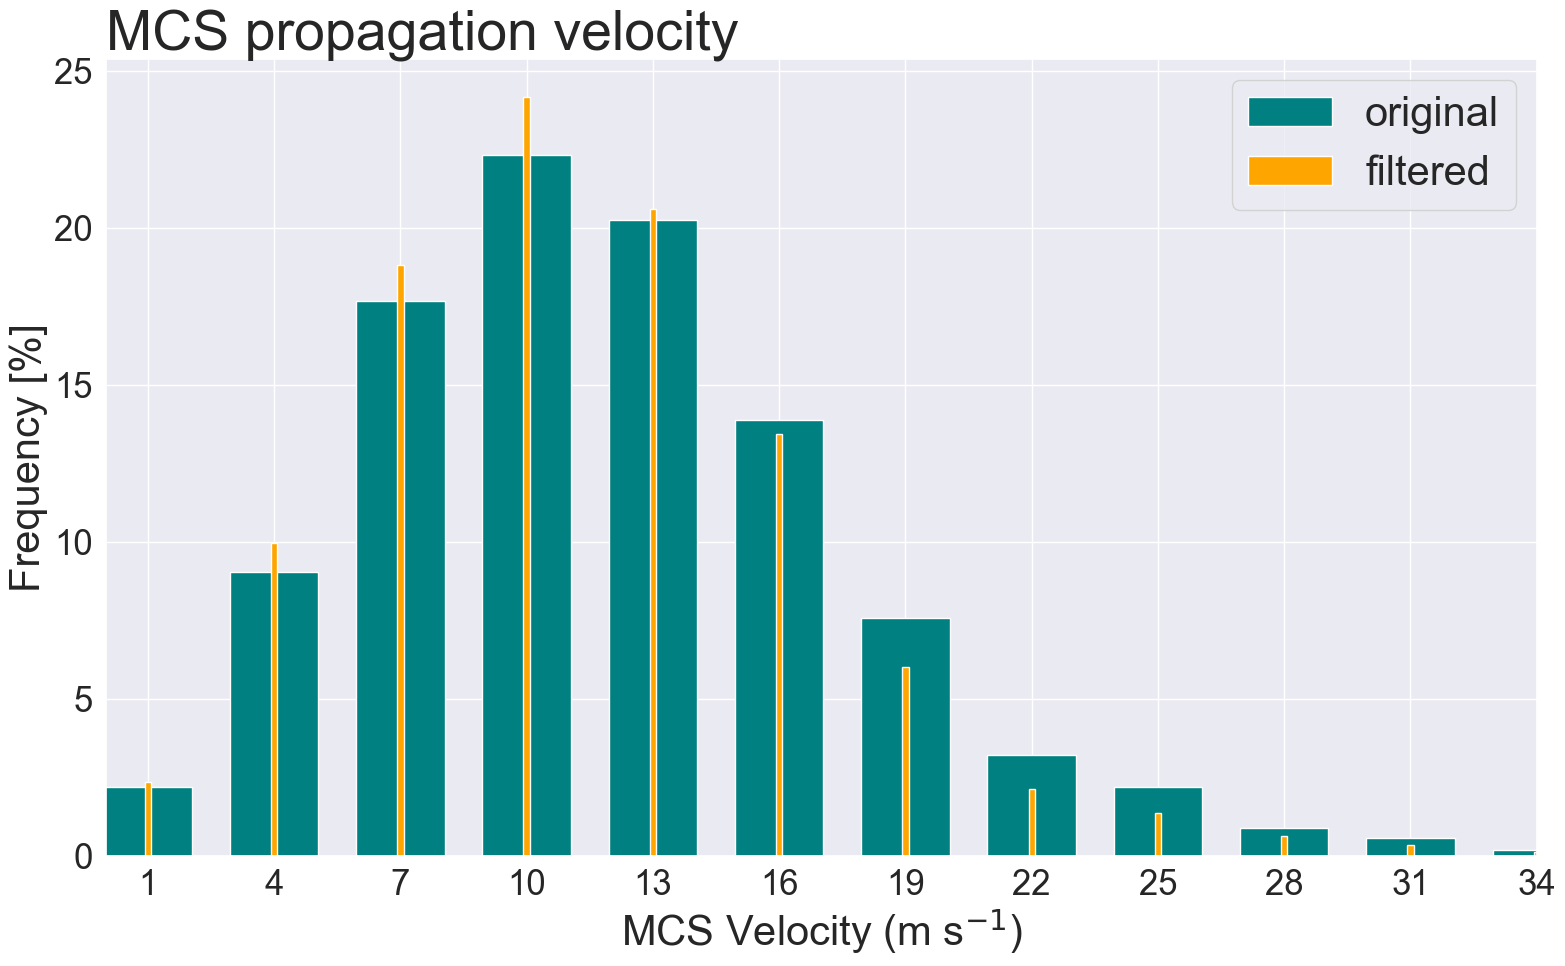

In [42]:
u_hist = u_histo/np.nansum(u_histo) * 100
f_hist = f_histo/np.nansum(f_histo) * 100

#plots of MCS velocity
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS propagation velocity', loc='left', fontsize= t)
plt.bar(bins[:-1], u_hist, color='teal', width = 3*0.7, label='original')
plt.xlim(0,30)
plt.xticks(bins.astype(int)[:-1],fontsize=n)
plt.yticks(np.arange(0,200)[::5], fontsize=n)
plt.xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
plt.ylabel('Frequency [%]',fontsize=f)

plt.bar(bins[:-1], f_hist,color='orange',width=3*0.05,label='filtered')

plt.legend(loc='best', fontsize=30)
plt.tight_layout()




Text(0.5, 1.0, 'Difference')

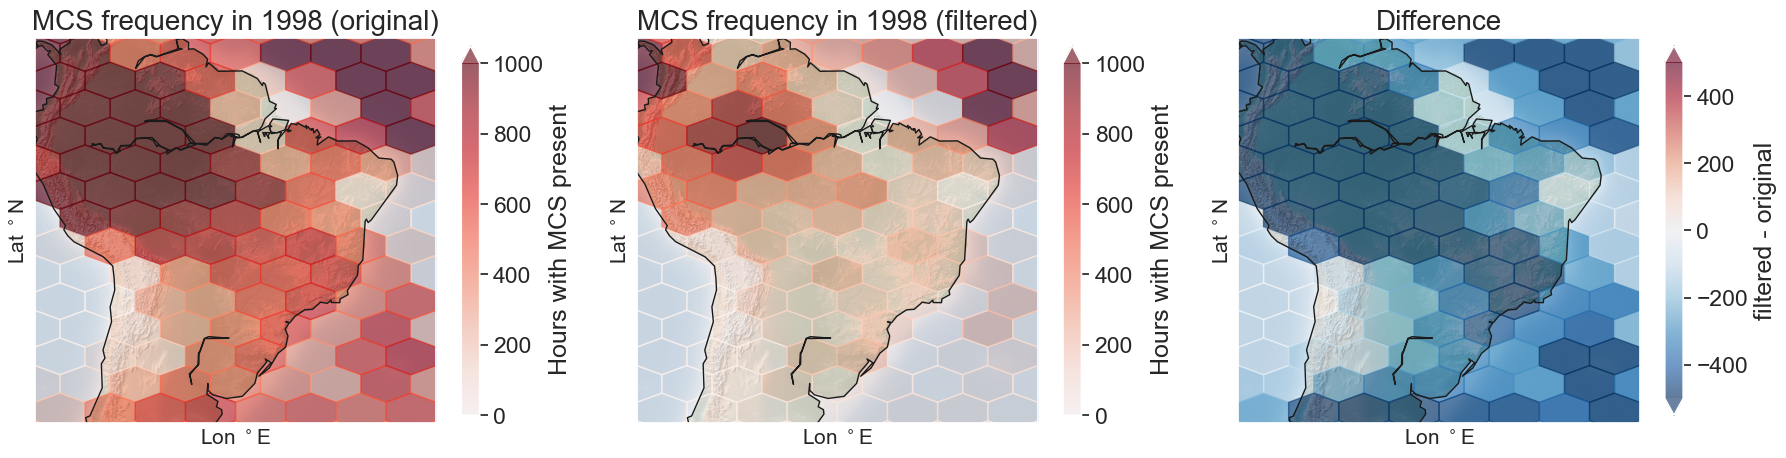

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

x_f = CCPF.longitude
y_f = CCPF.latitude

x_o = original.longitude
y_o = original.latitude


fig = plt.figure(figsize=(22,12))

ax1=plt.subplot(1,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines() # draw coastlines
#m.drawcountries() # draw political boundaries
m.shadedrelief()

hx_o = m.hexbin(x_o, y_o, gridsize=(8,8),cmap='Reds',alpha=0.6, vmin=0,vmax=1000, extent=(-80, -30, -40, 15))
cbar = plt.colorbar(hx_o, ax=ax1, shrink=0.4, label='Hours with MCS present', extend='max')
ax1.set_xlabel('Lon $^\circ$E', fontsize=15)
ax1.set_ylabel('Lat $^\circ$N', fontsize=15)
ax1.set_title('MCS frequency in {} (original)'.format(year), fontsize=20)


ax2=plt.subplot(1,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines() # draw coastlines
#m.drawcountries() # draw political boundaries
m.shadedrelief()

hx_f = m.hexbin(x_f, y_f, gridsize=(8,8),cmap='Reds',alpha=0.6, vmin=0,vmax=1000, extent=(-80, -30, -40, 15))
cbar = plt.colorbar(hx_f, ax=ax2, shrink=0.4, label='Hours with MCS present', extend='max')
ax2.set_xlabel('Lon $^\circ$E', fontsize=15)
ax2.set_ylabel('Lat $^\circ$N', fontsize=15)
ax2.set_title('MCS frequency in {} (filtered)'.format(year), fontsize=20)


ax3=plt.subplot(1,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines() # draw coastlines
#m.drawcountries() # draw political boundaries
m.shadedrelief()

# Create dummy hexbin using whatever data..:
hx_diff=m.hexbin(x_f, y_f, gridsize=(8,8), cmap='RdBu_r',alpha=0.6, vmin=-500,vmax=500, extent=(-80, -30, -40, 15))
hx_diff.set_array(hx_f.get_array()-hx_o.get_array())
cbar = plt.colorbar(hx_diff, ax=ax3, shrink=0.4, extend='both')
cbar.set_label(label='filtered - original')
#cbar.ax.tick_params(labelsize=12)
ax3.set_xlabel('Lon $^\circ$E', fontsize=15)
ax3.set_ylabel('Lat $^\circ$N', fontsize=15)
ax3.set_title('Difference', fontsize=20)


In [44]:
# lifetime analysis

#code from the calculate lifetime function in tobac but here I've taken it out of the function so that it's easier to 
#apply to histograms, means, max and mins. It has also been converted from minutes to hours

bin_edges=np.arange(6,30,2)
density=False

original_cell = original.groupby("cell")
minutes_original = (original_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_original = minutes_original/60 #converting from minutes to hours

filtered_cell = CCPF.groupby("cell")
minutes_filtered = (filtered_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_filtered = minutes_filtered/60 #converting from minutes to hours



In [45]:
original_histo, bins = np.histogram(lifetime_original, bins= np.linspace(4,28,13))
filtered_histo, bins = np.histogram(lifetime_filtered, bins= np.linspace(4,28,13))

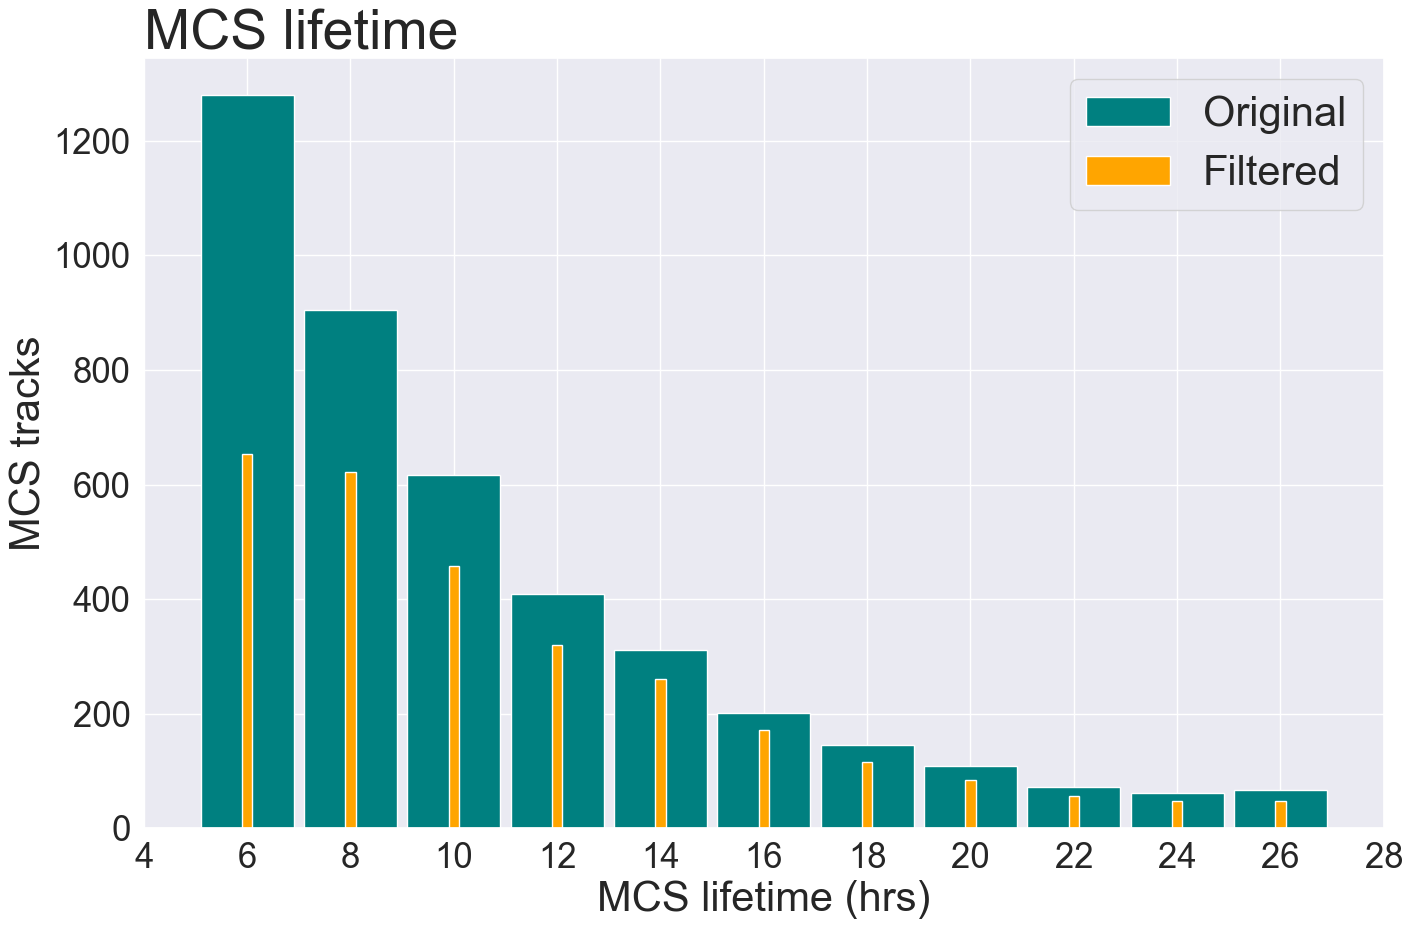

In [46]:
#plots of MCS lifetime
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS lifetime', loc='left', fontsize= t )
plt.bar(bins[:-1],original_histo,width=2*0.9,color= 'teal', label='Original')
plt.xlim(6,28)
plt.xticks(bins.astype(int)[0:27],fontsize=n)
plt.yticks(fontsize=n)
plt.xlabel('MCS lifetime (hrs)',fontsize=f)
plt.ylabel('MCS tracks',fontsize=f)

plt.bar(bins[:-1],filtered_histo, width=2*0.1,color= 'orange',label='Filtered')


plt.legend(loc='best',fontsize=f)
fig.tight_layout()





In [47]:
# lifetime as proportions
original_hist = original_histo/np.nansum(original_histo) * 100
filtered_hist =filtered_histo/np.nansum(filtered_histo) * 100

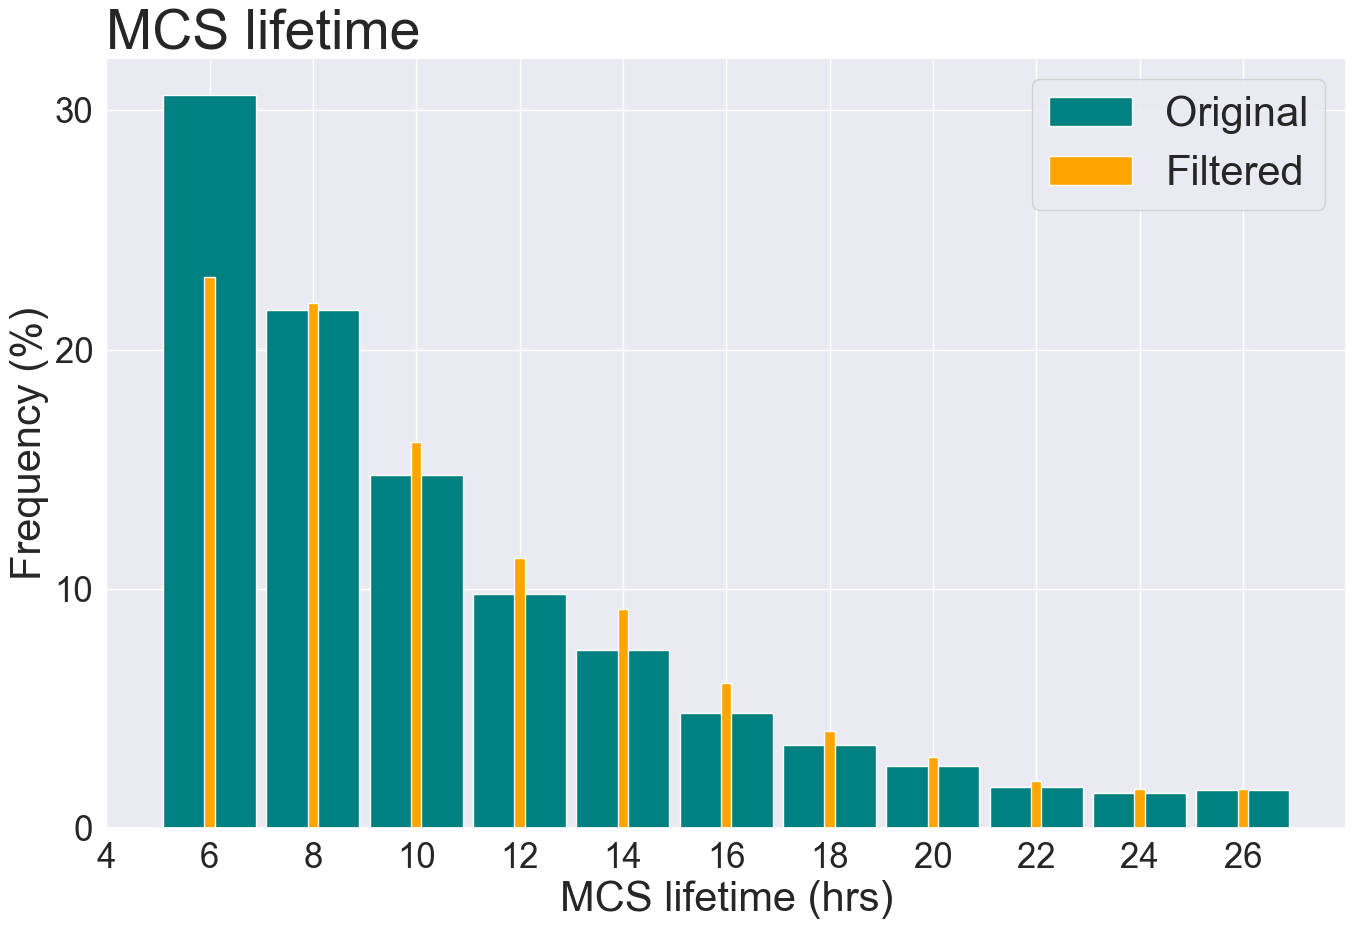

In [48]:
#plots of MCS lifetime
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(16,10))
t = 40
f= 30
n=25
lf= 35

plt.title('MCS lifetime', loc='left', fontsize= t )
plt.bar(bins[:-1],original_hist,width=2*0.9,color= 'teal', label='Original')
plt.xlim(5,28)
plt.xticks(bins.astype(int)[:-1],fontsize=n)
plt.yticks(np.arange(0,40)[::10], fontsize=n)
plt.xlabel('MCS lifetime (hrs)',fontsize=f)
plt.ylabel('Frequency (%)',fontsize=f)

plt.bar(bins[:-1],filtered_hist, width=2*0.1,color= 'orange',label='Filtered')


plt.legend(loc='best',fontsize=f)
fig.tight_layout()



